# Welcome Note

This notebook is designed to provide a comprehensive analysis of NVIDIA's stock prices using various time series analysis techniques.

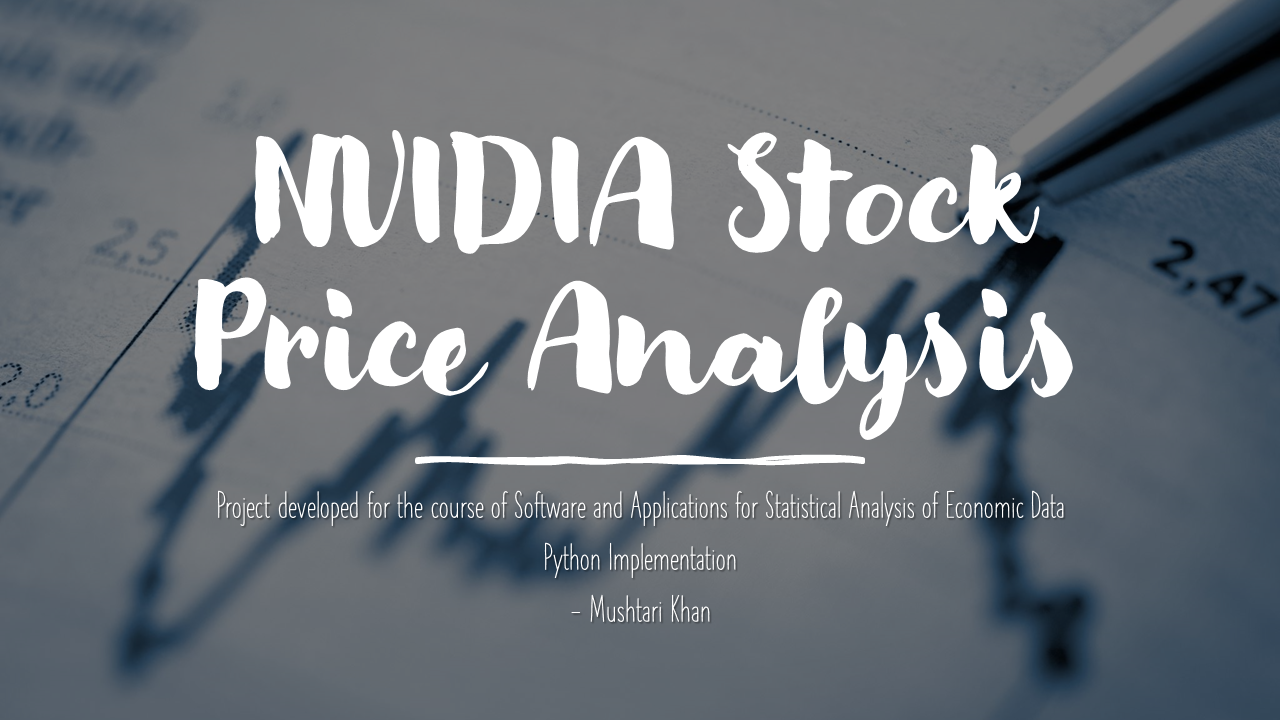

For Project Day to Day Progress and other Documentation, References visit:

* [NVIDIA Stock Price Analysis](https://www.notion.so/NVIDIA-Stock-Price-Analysis-d8b6ef648d674c498a626e3c00f6c52e?pvs=4)
or refer the Webpage shared in the folder
* [GitHub Repo](https://github.com/Mushtari-Khan-unina/TSA_Final)

The final code is available as NVDA Analysis in the GitHub Repo

The link to the colab file :

**Instructions for Execution**

- The Libraries being installed can take a significant amount of time
- Change the Path of the CSV file while importing
- In the section Custom Candle Stick provide input
- The Models comparision section of future work has been commented to prevent the execution
- Change point Detection methods will take time for computation


# Importing

## Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
!pip install arch # Library for modelling GARCH

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 4.9 MB/s eta 0:00:00


In [5]:
!pip install ruptures # Library for Change Point Detection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.7 MB/s eta 0:00:00


In [6]:
!pip install pycaret pmdarima #Library to run TSForecastingExperiment and Auto ARIMA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 20.

In [7]:
# Other Necessary Libraries
#pasted repeative ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from arch.unitroot import PhillipsPerron
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.express as px
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import STL
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from arch import arch_model
import ruptures as rpt
from pycaret.time_series import TSForecastingExperiment

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Dataset

The dataset for the NVIDIA stock Prices was imported from [Yahoo Finance](https://finance.yahoo.com/quote/NVDA/history/)

In [9]:
file_path = '/content/drive/MyDrive/Trails/NVDA 1.csv'
data = pd.read_csv(file_path) # importing the dataset from the file path in Drive
data.head()

Date     Open     High      Low    Close  Adj Close     Volume
0  2012-11-20  0.28950  0.29075  0.28425  0.28725   0.265173  336976000
1  2012-11-21  0.28725  0.29625  0.28700  0.29550   0.272789  422312000
2  2012-11-23  0.29675  0.30100  0.29525  0.29750   0.274636  276932000
3  2012-11-26  0.29800  0.30350  0.29750  0.30275   0.279482  364600000
4  2012-11-27  0.30150  0.30850  0.29900  0.30400   0.280636  451404000

In [10]:
data.tail()

Date        Open        High         Low       Close   Adj Close  \
2910  2024-06-14  129.960007  132.839996  128.320007  131.880005  131.880005   
2911  2024-06-17  132.990005  133.729996  129.580002  130.979996  130.979996   
2912  2024-06-18  131.139999  136.330002  130.690002  135.580002  135.580002   
2913  2024-06-20  139.800003  140.759995  129.520004  130.779999  130.779999   
2914  2024-06-21  127.120003  130.630005  124.300003  126.570000  126.570000   

         Volume  
2910  309320400  
2911  288504400  
2912  294335100  
2913  517768400  
2914  649445800

# About NVIDIA

In [11]:
#Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2915 non-null   object 
 1   Open       2915 non-null   float64
 2   High       2915 non-null   float64
 3   Low        2915 non-null   float64
 4   Close      2915 non-null   float64
 5   Adj Close  2915 non-null   float64
 6   Volume     2915 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.5+ KB


We have 7 attributes in our dataset with non null values and 2914 entries.

## Attributes

> About the attributes:
1. Open Price: The starting price of the stock for each trading day.
2. High Price: The highest price reached during the trading day.
3. Low Price: The lowest price during the trading day.
4. Close Price: The final price at which the stock traded at the end of the trading day.
5. Adjusted Close Price: This adjusts the close price for corporate actions like dividends, stock splits, etc.
6. Volume: The number of shares traded each day.

Note: the prices are in USD


In [12]:
#descriptive statistics of all columns
data.describe()

Open         High          Low        Close    Adj Close  \
count  2915.000000  2915.000000  2915.000000  2915.000000  2915.000000   
mean     12.203867    12.424575    11.971037    12.212220    12.184745   
std      19.324402    19.672322    18.933069    19.333715    19.338275   
min       0.287250     0.290750     0.284250     0.287250     0.265173   
25%       0.646500     0.657000     0.633500     0.647125     0.630227   
50%       4.743000     4.817500     4.659750     4.738500     4.698981   
75%      15.091000    15.345750    14.817875    15.112000    15.095000   
max     139.800003   140.759995   130.690002   135.580002   135.580002   

             Volume  
count  2.915000e+03  
mean   4.499863e+08  
std    2.473682e+08  
min    4.564400e+07  
25%    2.912780e+08  
50%    3.978650e+08  
75%    5.422780e+08  
max    3.692928e+09

By using describe function from the pandas library, we can derive insights on the NVIDIA stock data. The mean stock prices across all the variables hover around 12. The price range of our stock data ranges from 0.28 to 139.8, suggesting potential increase in the stock price over the years and the presence of trend in the data.

In [13]:
#Checking if there are any missing values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No missing values. Yet it is to be considered that the date column if set frequency of 'D' can raise a lot of missing values as the data is of Business days i.e trading days

***What is the general behavior and trend of Nvidia's stock prices over time?***

In [14]:
# Creating subplots on all columns in dataset
fig = make_subplots(
    rows=6,
    cols=1,
    shared_xaxes=False,
    vertical_spacing=0.05,
    subplot_titles=('Open Price', 'High Price', 'Low Price', 'Close Price', 'Adjusted Close Price', 'Volume')  # Titles for each subplot
)
fig.add_trace(go.Scatter(x=data.index, y=data['Open'], name='Open'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['High'], name='High'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Low'], name='Low'), row=3, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], name='Close'), row=4, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], name='Adj Close'), row=5, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Volume'], name='Volume', mode='lines'), row=6, col=1)
fig.update_layout(
    height=1200, width=1000,
    title_text="NVIDIA Stock Attributes",
    showlegend=True
)
fig.update_annotations(font_size=12)
fig.show()


The make_subplots function to create multiple interactive subplots using Plotly library was used to generate six plots on the attributes in our dataset. This allows us to have a detailed examination of the attributes behaviour over the time. [Subplots Doc.](https://plotly.com/python-api-reference/generated/plotly.subplots.make_subplots.html)

 The Open, High, Low, Close, and Adjusted Close prices all show significant upward trends, especially in the latter part of the series, and when plotted against the Date after 2020.


## Volume

**What insights can be drawn from the volume of NVIDIA stock traded?**

In [15]:
#making a copy of data
Volume_data = data[['Date', 'Volume']].copy()

fig = px.line(Volume_data, x='Date', y='Volume', title='NVIDIA Volume over the years')
fig.show()

The volume of NVIDIA stock traded over the years shows significant fluctuations, with high spikes indicating periods of high trading activity. The highest volume peaks are between 2017-2018.

**Is the Volume data stationary?**

In [16]:
#Checking if the Volume is stationary
res = adfuller(Volume_data.Volume)
if res[1] < 0.05:
  print('The data of {} is stationary series'.format(Volume_data.Volume.name))
else:
  print('The data of {} is not stationary series'.format(Volume_data.Volume.name))

The data of Volume is stationary series


The Volume attribute in the the data was found to be stationary through ADF test. Further details about ADF test can be found in stationary tests part of this notebook.

Now, we will try to extract more knowledge through feature extraction on the Date column to see the changes in Volume

In [17]:
#Feature extraction

Volume_data['Date'] = pd.to_datetime(data.Date)
Volume_data = Volume_data.set_index('Date')

#Extracting the day, month and year from the Date index
Volume_data['year'] = Volume_data.index.year
Volume_data['month'] = Volume_data.index.month
Volume_data['day'] = Volume_data.index.day

In [18]:
fig = px.line(Volume_data, x='month', y='Volume', facet_col='year', facet_col_wrap=4, title='NVIDIA Volumes Monthwise data for the Year')
fig.show()

In the year 2017 the Volume data i.e the shares traded were the highest indicating highest trading activity in the history of NVIDIA's stock for the month of June (month=6).

In [19]:
Volume_data['quarter'] = Volume_data.index.quarter

# Aggregating the data by quarters
quarterly_data = Volume_data.groupby(['year', 'quarter']).sum().reset_index()

# Creating an interactive grouped bar plot using Plotly
fig = px.bar(quarterly_data, x='quarter', y='Volume', color='year',
             barmode='group', title='NVidia Volume by Quarter and Year')

# Updating layout for better visualization
fig.update_layout(
    xaxis_title='Quarter',
    yaxis_title='Volume',
    legend_title='Year',
    barmode='group'
)

# Show the plot
fig.show()

When breaked down to quarter wise the performance of the stock for Quarters 1 and 2 over the years has been almost same and Quarter 3 was fund to be low. Another significant insight as seen earlier is for the year 2017, being the highest bandwidth i.e perfoming well than others.

The first quarter consistently shows higher trading volumes across all years, suggesting a seasonal effect where trading activity is higher at the beginning of the year.

## Candle Stick Charts

> Candlestick charts are a type of financial chart used to describe price movements of securities, derivatives, and currencies. Each "candlestick" typically shows one day, and contains the opening, closing, high, and low prices for that day. This type of chart is very useful for technical analysis, as it helps to visualize price movements over time.

> The wider part of the candlestick represents the range between the opening and closing prices.

* Green Body: Indicates a price increase (close > open).
* Red Body: Indicates a price decrease (close < open).

In [20]:
#Plotly code for candle stick
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(title='NVIDIA Stock Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

Using candlestick chart a detailed visualization of NVIDIA stock's price movements over time are plotted above. Each candlestick represents the open, high, low, and close prices for a specific trading period. Green candlesticks indicate bullish periods where the closing price was higher than the opening price, while red candlesticks indicate bearish periods where the closing price was lower. The length of the wicks shows the volatility within each trading period. [Candlestick Charts](https://plotly.com/python/candlestick-charts/#simple-candlestick-with-pandas)


### Custom

To have a more closer look the chart was modified to plot the chart for a specific year in time and further the behaviour of the stock over the month. [Customizing Candlestick](https://python-graph-gallery.com/554-custom-candle-stick-plotly/)

In [21]:
data_graph = data.copy()

# Ensure the 'Date' column is datetime and set it as the index
data_graph['Date'] = pd.to_datetime(data_graph['Date'])
data_graph.set_index('Date', inplace=True)

# Ask the user for a specific year
year = int(input("Enter the year you want to analyze (e.g., 2020): "))

# Filtering the data for the selected year
year_data = data_graph[data_graph.index.year == year]

# Creating a daily candlestick chart for the selected year
fig_daily = go.Figure(data=[go.Candlestick(x=year_data.index,
                                           open=year_data['Open'],
                                           high=year_data['High'],
                                           low=year_data['Low'],
                                           close=year_data['Close'])])

fig_daily.update_layout(title=f'NVIDIA Stock Candlestick Chart for {year} (Daily)',
                        xaxis_title='Date',
                        yaxis_title='Price')

fig_daily.show() # Day wise

# Resampling data to monthly for the selected year
monthly_data = year_data.resample('M').agg({'Open': 'first',
                                            'High': 'max',
                                            'Low': 'min',
                                            'Close': 'last'})

# Creating a monthly candlestick chart for the selected year
fig_monthly = go.Figure(data=[go.Candlestick(x=monthly_data.index,
                                             open=monthly_data['Open'],
                                             high=monthly_data['High'],
                                             low=monthly_data['Low'],
                                             close=monthly_data['Close'])])

fig_monthly.update_layout(title=f'For the Months in the year {year}',
                          xaxis_title='Date',
                          yaxis_title='Price')

fig_monthly.show() #month wise in the selected year

Enter the year you want to analyze (e.g., 2020): 2015


# Adj Close

> Adjusted Close Price is the closing price of a stock that has been adjusted to include any distributions and corporate actions that occurred at any time before the next day’s open. This includes dividends, stock splits, and new stock offerings. The adjusted close price provides a more accurate reflection of the stock's value than the raw closing price because it accounts for these events.

In this section, we will perform Decomposition, stationarity tests, Transformations, ARIMA modelling and Change point detection on Adj Clsoe Price.

Slicing the data and selecting only the Date and Adj. Close Column

In [22]:
# Selecting  only the 'Date' and 'Adj Close' columns
nvidia_data = data[['Date', 'Adj Close']].copy() #copy of the original data

nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])
nvidia_data.set_index('Date', inplace=True) #Making the Date Column as Index

print(nvidia_data.head())

            Adj Close
Date                 
2012-11-20   0.265173
2012-11-21   0.272789
2012-11-23   0.274636
2012-11-26   0.279482
2012-11-27   0.280636


In [23]:
nvidia_data.tail()

Adj Close
Date                  
2024-06-14  131.880005
2024-06-17  130.979996
2024-06-18  135.580002
2024-06-20  130.779999
2024-06-21  126.570000

The data starts from November 20, 2012, providing a historical perspective on the stock's adjusted closing prices till June 21, 2024. The Adj price has seen a potential increase in its value.

In [24]:
# Creating an interactive plot using Plotly
fig = px.line(nvidia_data, x=nvidia_data.index, y='Adj Close', title='NVIDIA Stock Price')
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Adj Close Price',
    legend_title_text='Stock Price',
    template='ggplot2'
)
fig.show()

The plot shows a clear upward trend in NVIDIA's stock price over the period.
The stock price remained relatively low and stable until around 2016.
After 2016, there is a noticeable increase in stock price, particularly from the year 2020. The stock price experienced fluctuations and volatility, particularly visible after 2020. Sharp rises and falls are observed, indicating periods of high volatility.The most significant increase in stock price appears to have occurred in the last couple of years, with a potential rise observed around 2023-2024.

## Decomposition

**Does the Adj Close Price exhibit seasonality?**

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

> For decomposition of the our NVIDIa data we can use the following methods,

> 1. **seasonal_decompose** is a classical method that decomposes a time series using moving averages. It assumes that the seasonality is constant over time (additive or multiplicative).

> 2. **STL (Seasonal-Trend decomposition using Loess)** is more flexible and robust, allowing for changing seasonality over time. It uses locally weighted regression to decompose the series.





Given the strong trend and potential non-linear seasonal effects, STL decomposition is likely more suitable. STL can handle changes in trend and seasonality over time, which seems relevant for our dataset.

Yet we will perform both decompositions and compare the results to see which method provides more insightful components for our analysis.

### Seasonal Decompose

<Figure size 800x550 with 0 Axes>

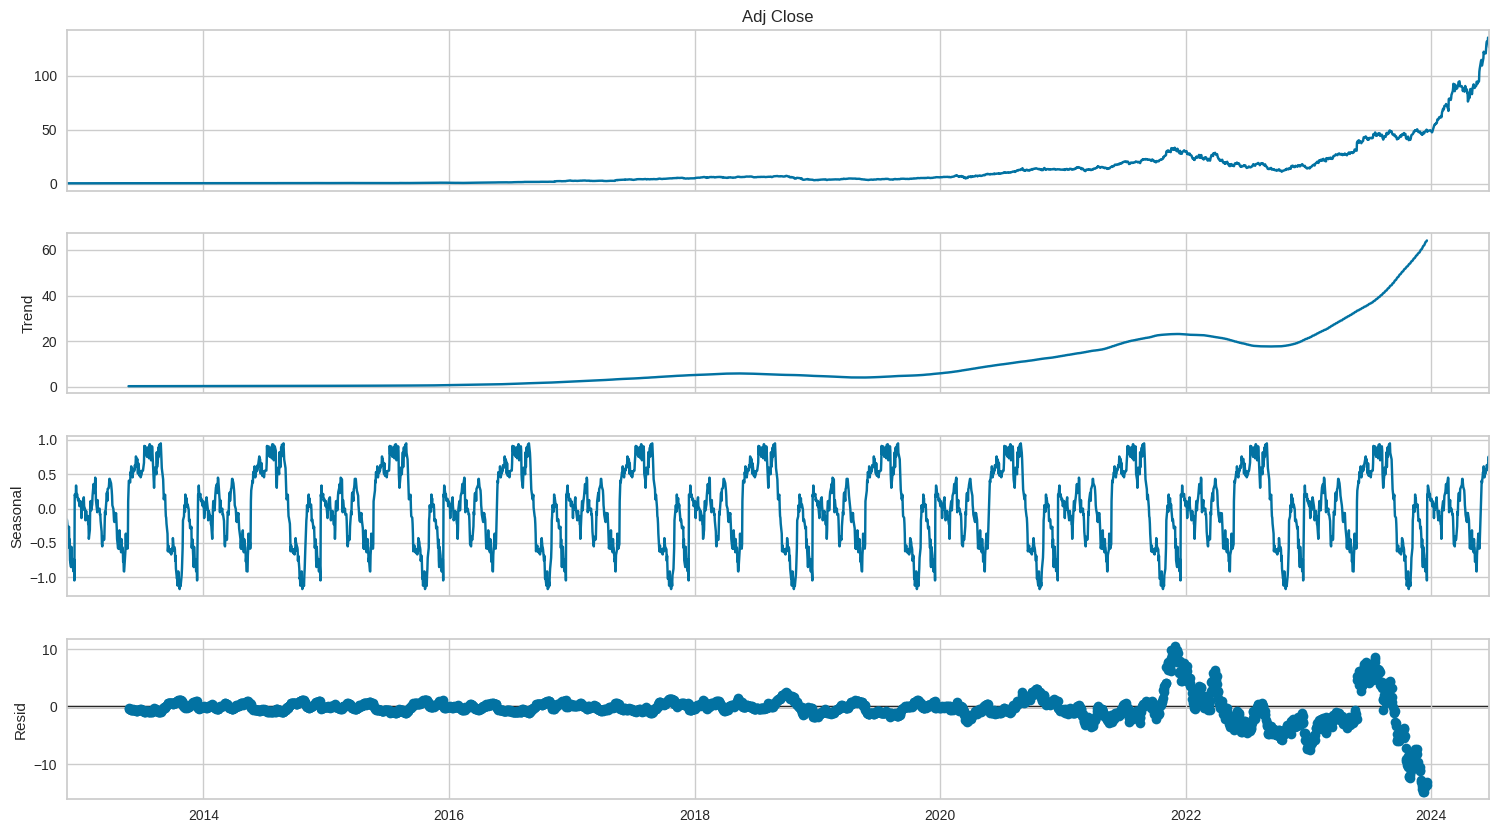

In [26]:
#To separate the trend and the seasonality from a time series,
# we can decompose the series using the following code.
# For yearly seasonality in daily stock data the period is set to 252
#Assuming 252 trading days per year
result = seasonal_decompose(nvidia_data['Adj Close'], period=252)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

Seasonl decompose hs assumed seasonality is constant over time, which may not be suitable for our case.

### STL  - Seasonal and Trend decomposition using Loess

> As STL can handle both additive and multiplicative seasonality and can adapt to changes in the seasonal component over time, and can provide more reliable decomposition when data is highly variable we also try deccomposition using it.[STL](https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html)

In [27]:
# Seting the period for STL decomposition
period = 252  # For yearly seasonality in daily stock data

stl = STL(nvidia_data['Adj Close'], period=period)
result = stl.fit()

# Extracting the components from the STL result
trend = result.trend
seasonal = result.seasonal
residual = result.resid


# Creating a DataFrame to hold the components and other relevant columns
components_df = pd.DataFrame({
    'Date': nvidia_data.index,
    'Adj Close': nvidia_data['Adj Close'],
    'Trend': trend,
    'Seasonal': seasonal,
    'Residual': residual
})

components_df['Model'] = 'STL'

# Storing All the columns
components_df = components_df[['Model', 'Date', 'Adj Close', 'Trend', 'Seasonal', 'Residual']]


In [28]:
components_df

Model       Date   Adj Close      Trend   Seasonal   Residual
Date                                                                    
2012-11-20   STL 2012-11-20    0.265173   0.254753  -0.027693   0.038113
2012-11-21   STL 2012-11-21    0.272789   0.255243  -0.020859   0.038404
2012-11-23   STL 2012-11-23    0.274636   0.255734  -0.023072   0.041974
2012-11-26   STL 2012-11-26    0.279482   0.256224  -0.013936   0.037194
2012-11-27   STL 2012-11-27    0.280636   0.256715  -0.006761   0.030682
...          ...        ...         ...        ...        ...        ...
2024-06-14   STL 2024-06-14  131.880005  91.438932  28.992735  11.448338
2024-06-17   STL 2024-06-17  130.979996  91.672006  28.109307  11.198684
2024-06-18   STL 2024-06-18  135.580002  91.905174  30.926024  12.748805
2024-06-20   STL 2024-06-20  130.779999  92.138435  27.954535  10.687028
2024-06-21   STL 2024-06-21  126.570000  92.371790  24.855291   9.342919

[2915 rows x 6 columns]

In [29]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.05,  # Space between the plots
                    subplot_titles=('Trend', 'Seasonality', 'Residuals'))

fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=trend, name='Trend'),
    row=1, col=1
)

# Seasonality subplot
fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=seasonal, name='Seasonality'),
    row=2, col=1
)

# Residuals subplot
fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=residual, name='Residuals'),
    row=3, col=1
)

fig.update_layout(height=800, width=1000,
                  title_text="Decomposition of NVIDIA Stock Adj Price Data",
                  showlegend=False)
fig.show()

The STL decomposition appears to provide a slightly smoother and more adaptive trend component, adjusting more flexibly to recent changes.

STL decomposition shows a more variable and evolving seasonal pattern, which may better reflect the true seasonal dynamics if they are changing over time.

Both methods indicate periods of increased volatility with spikes in residuals, likely due to external factors not captured by trend or seasonality.

## Rolling Mean

***What are the trends in rolling mean and standard deviation over time?***

In [30]:
# Handling the missing values
nvidia_data = nvidia_data.interpolate()

#creating the function to call over the data multiple times
def plot_rolling_statistics(series, window=12):
    # Calculate rolling mean and standard deviation
    rolmean = series.rolling(window=window).mean()
    rolstd = series.rolling(window=window).std()

    # Creating a Plotly graph object
    fig = go.Figure()

    # Adding the original series to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=series,
        mode='lines',
        name='Original',
        line=dict(color='blue')
    ))

    # Adding the rolling mean to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=rolmean,
        mode='lines',
        name='Rolling Mean',
        line=dict(color='red')
    ))

    # Adding the rolling standard deviation to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=rolstd,
        mode='lines',
        name='Rolling Std',
        line=dict(color='black')
    ))

    # Updating plot layout
    fig.update_layout(
        title='Rolling Mean & Standard Deviation',
        xaxis_title='Date',
        yaxis_title='Value',
        width=800,  # Adjust width
        height=400   # Adjust height
    )


    fig.show()


# Original Series
plot_rolling_statistics(nvidia_data['Adj Close'])

The alignment of the rolling mean with the original series confirms the presence of a strong and consistent upward trend in the stock prices and is a smoothen the noise giving a clear view of the trend in our data.  The increasing trend suggests that our series is non-stationary and transformation is required.

We will perform stationarity tests now to prove that the Adj Close price data is non-stationary.

## Stationarity Tests

***Is the ADj Close Price data stationary?***

### **ADF Test**

> The Augmented Dickey-Fuller (ADF) test is used to test for a unit root in a time series sample, which helps in determining if the series is stationary.

**Null Hypothesis (H0):** The series has a unit root (non-stationary).

**Alternative Hypothesis (H1):** The series does not have a unit root (stationary).

we have already impored adfuller from the library [Statsmodels adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

* If the p-value is less than the significance level (e.g., 0.05), reject the null hypothesis. The series is stationary.

* If the p-value is greater than the significance level, fail to reject the null hypothesis. The series is non-stationary.

In [31]:
#Creating a function to apply ADF test and also print the critical values
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')

print("ADF Test on Original Series:")
adf_test(nvidia_data['Adj Close'])

ADF Test on Original Series:
ADF Statistic: 5.872962520786018
p-value: 1.0
Critical Value (1%): -3.432617102137327
Critical Value (5%): -2.8625416527115592
Critical Value (10%): -2.567303208514837


The results of the ADF test strongly suggest that the original series of NVIDIA adjusted closing prices is non-stationary.

The p-value is 1.0, which is significantly higher than our conventional significance level of 0.05.

This is consistent with the visual observations of the rolling statistics, which showed a clear increasing trend.

### **KPSS Test**

>  Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test is used to test for stationarity around a deterministic trend. It is complementary to the ADF test.

**Null Hypothesis (H0):** The series is stationary.

**Alternative Hypothesis (H1):** The series is not stationary (has a unit root).
Python Implement

Similar to adf test we have imported kpss from [Statsmodels KPSS](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html)

* If the p-value is less than the significance level, reject the null hypothesis. The series is non-stationary.

* If the p-value is greater than the significance level, fail to reject the null hypothesis. The series is stationary.

In [32]:
#Creating a Function to apply KPSS Test
def kpss_test(series):
    result = kpss(series.dropna(), regression='c')
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[3].items():
        print(f'Critical Value ({key}): {value}')

print("KPSS Test on Original Series:")
kpss_test(nvidia_data['Adj Close'])

KPSS Test on Original Series:
KPSS Statistic: 5.136646551283202
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


The KPSS statistic 5.14 is significantly higher than the critical values at the 1%, 2.5%, 5%, and 10% levels. This suggests that the test statistic is in the rejection region, which is greater than these critical values, indicating the null hypothesis that the series is stationary can be rejected.

### **Phillips-Perron test**

> The Phillips-Perron (PP) test is another test for a unit root in a time series sample. It differs from the ADF test mainly in how it handles serial correlation and heteroscedasticity in the errors.

**Null Hypothesis (H0):** The series has a unit root (non-stationary).

**Alternative Hypothesis (H1):** The series does not have a unit root (stationary).

For performing PP test we imported the library from [arch for pp test](https://arch.readthedocs.io/en/latest/unitroot/unitroot_examples.html)



* Similar to the ADF test, if the p-value is less than the significance level, reject the null hypothesis. The series is stationary.
* If the p-value is greater than the significance level, fail to reject the null hypothesis. The series is non-stationary.

In [33]:
#Crteaing the function for PP test
def pp_test(series):
    result = PhillipsPerron(series.dropna())
    print(result.summary().as_text())

print("Phillips-Perron Test on Original Series:")
pp_test(nvidia_data['Adj Close'])

Phillips-Perron Test on Original Series:
     Phillips-Perron Test (Z-tau)    
Test Statistic                  7.530
P-value                         1.000
Lags                               28
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


The test statistic 7.530 is far greater than the critical values at all common significance levels and p value is also equal to one infering us that the data is non stationary.

## Transformation

Since all the stationarity tests suggest that our ADj Close price data is non stationary we can consider performing transfoormation to make the data stationary.

We will follow a ste by step proedure where we transform the data, inspect the rolling window, perform the stationaritytest and if the test fails transform again.

### ndiffs

***What is the appropriate differencing order for making the series stationary?***

Since differencing the time series makes it stationary we will like to know what order of differencing is suitable for our case of Adj Close price.

In [34]:
from pmdarima.arima.utils import ndiffs

The ndiffs function from the pmdarima library helps determine the optimal number of differences needed to make a time series stationary. The function uses different statistical tests, such as the ADF test, to compute the number of differencing required. [Pmdarima ndiffs](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ndiffs.html)

In [35]:
#using ndiffs to estimate the arima differencing term
ndiffs(nvidia_data['Adj Close'], test="adf")

1

This means that, according to the ndiffs with ADF test, applying a first-order differencing i.e d=1 is sufficient to make the adjusted closing prices data stationary.

### Log Transformation

A log transformation is often applied to stabilize the variance i.e make it more constant over time, especially when dealing with exponential growth patterns

In [36]:
# applying log transformation
nvidia_data['log_Close'] = np.log(nvidia_data['Adj Close'])
plot_rolling_statistics(nvidia_data['log_Close'])

The log transformation appears to have reduced the trend and the stable rolling standard deviation indicates reduced volatility in the log-transformed Adj Close price. , making the series closer to stationarity. This is a good pre-processing step before applying further transformations like differencing to achieve full stationarity.

In [37]:
# ADF of Log Transformed data
print("ADF Test on Log Transformed Series:")
adf_test(nvidia_data['log_Close'])

ADF Test on Log Transformed Series:
ADF Statistic: 0.5932017973202582
p-value: 0.9874468610192699
Critical Value (1%): -3.432602266252907
Critical Value (5%): -2.8625351003877864
Critical Value (10%): -2.5672997201035046


After applying a log transformation, it's essential to re-test the series for stationarity using tests like ADF to check if stationarity was achieved. As stationarity requires both constant mean and variance over time, the ADF test on log transformed data still rejects the non stationarity.

When Log Transformation Might Be Enough?

Log transformation can be sufficient to make the data stationary if:

* The primary issue with the original series is variance instability rather than a trend.
* The log-transformed series exhibits no significant trend or seasonality.
* The log-transformed series passes stationarity tests without further transformations.

To remove the trend and achieve stationarity we will now perfom differencing on log adj close price

### Differencing

In [38]:
# Applying differencing on the log transformed data
nvidia_data['log_diff_Close'] = nvidia_data['log_Close'].diff().dropna()
plot_rolling_statistics(nvidia_data['log_diff_Close'])

Trend Removal: The rolling mean is stable around zero, indicating the trend has been successfully removed.

Variance Stabilization: The rolling standard deviation is stable, indicating that the variance is now more consistent over time.

These observations suggest that the log-differencing transformation has successfully made the series stationary.

In [39]:
# Checking and removing any infinite values which can result from improper data handling
nvidia_data['log_diff_Close'].replace([np.inf, -np.inf], np.nan, inplace=True)
nvidia_data['log_diff_Close'].dropna(inplace=True) #Drpping NAN values

Dropping all the NaN values is essential which were generated during differencing the series.

Again Applying the ADF test to check stationarity.

In [40]:
# Applying ADF on Log Differenced data to cross verify stationarity
print("ADF Test on Log Differenced Series:")
adf_test(nvidia_data['log_diff_Close'])

ADF Test on Log Differenced Series:
ADF Statistic: -19.0951709457048
p-value: 0.0
Critical Value (1%): -3.432602266252907
Critical Value (5%): -2.8625351003877864
Critical Value (10%): -2.5672997201035046


The ADF statistic is -19.095, which is much lower than the critical values at the 1%, 5%, and 10% levels. This suggests that the test statistic is in the rejection region, which means we reject the null hypothesis of non-stationarity.

The results of the ADF test strongly suggest that the log-differenced series of NVIDIA adjusted closing prices is stationary. This means that the series now has a constant mean and variance over time, making it suitable for time series modeling.

In [41]:
nvidia_data

Adj Close  log_Close  log_diff_Close
Date                                             
2012-11-20    0.265173  -1.327373             NaN
2012-11-21    0.272789  -1.299057        0.028316
2012-11-23    0.274636  -1.292309        0.006748
2012-11-26    0.279482  -1.274817        0.017491
2012-11-27    0.280636  -1.270697        0.004121
...                ...        ...             ...
2024-06-14  131.880005   4.881892        0.017363
2024-06-17  130.979996   4.875045       -0.006848
2024-06-18  135.580002   4.909562        0.034517
2024-06-20  130.779999   4.873517       -0.036045
2024-06-21  126.570000   4.840796       -0.032721

[2915 rows x 3 columns]

## ARIMA

***How can we model the Adj Close prices using ARIMA model?***

> ARIMA models require the data to be stationary, meaning it should have a constant mean and variance over time. By applying both log transformation and differencing, we have already achieved stationarity. So for manual ARIMA modelling we require the p,d,q terms.

We can proceed in two ways

* If we use the log transformed Adj Close Price to model the data we can set the d=1 as we have seen that first order differencing is making the data stationary from the previous sections by both ndiffs and adf test.

* If we use the log differenced Adj Close price we can set the d=0 as setting d=1 again would be redundant and incorrect.

Since d is known from transforming, lets plot acf and pacf to obtain p and q values.

### ACF, PACF

**ACF Plot (Autocorrelation Function):**

> The ACF plot shows the correlation of the time series with its own lagged values.


**PACF Plot (Partial Autocorrelation Function):**

> The PACF plot shows the partial correlation of the time series with its own lagged values, after removing the effect of previous lags.

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Imported the libraries to plot Autocorrelation function plot and Partial Autocorrelaton function plot.

Let's first plot on Original Adj Close Price

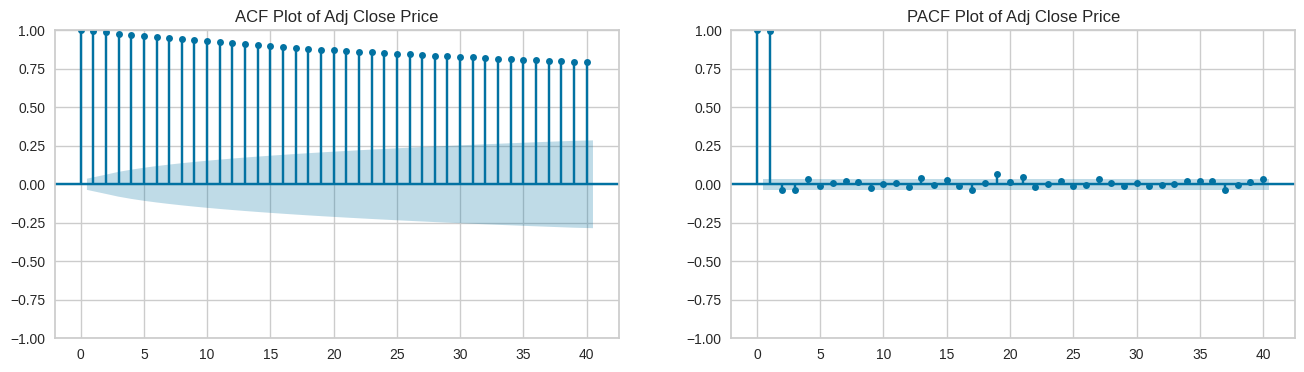

In [43]:
# Ploting ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(nvidia_data['Adj Close'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('ACF Plot of Adj Close Price')

# PACF plot
plot_pacf(nvidia_data['Adj Close'].dropna(), lags=40, ax=axes[1])
axes[1].set_title('PACF Plot of Adj Close Price')

plt.show()

* ACF Plot: The autocorrelations are very high and decrease very slowly, indicating strong non-stationarity.

* PACF Plot: The partial autocorrelations are also very high at the initial lags, reinforcing the non-stationarity of the series.

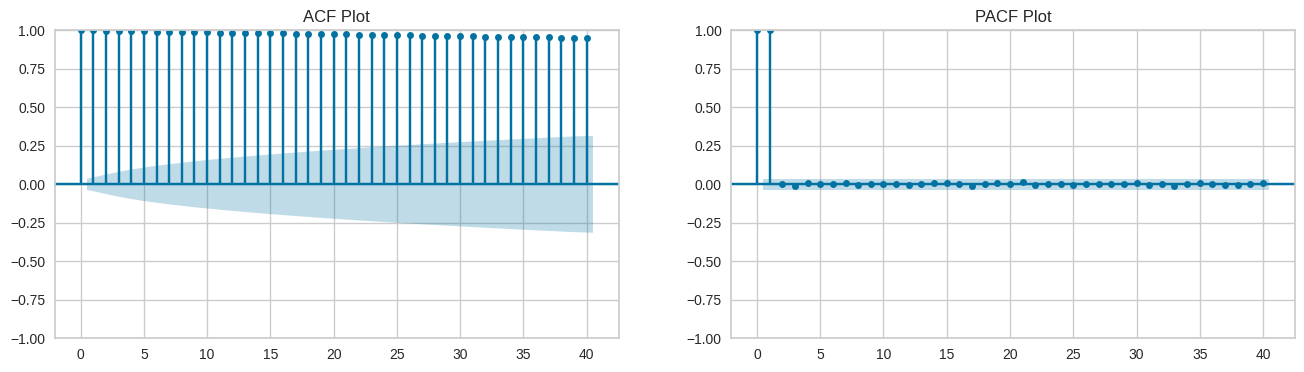

In [44]:
# Ploting ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(nvidia_data['log_Close'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('ACF Plot')

# PACF plot
plot_pacf(nvidia_data['log_Close'].dropna(), lags=40, ax=axes[1])
axes[1].set_title('PACF Plot')

plt.show()

* ACF Plot: The pattern is similar to the original series with high autocorrelations, indicating that the series remains non-stationary after log transformation alone.

* PACF Plot: The partial autocorrelations are high at initial lags, suggesting the presence of a strong trend component.

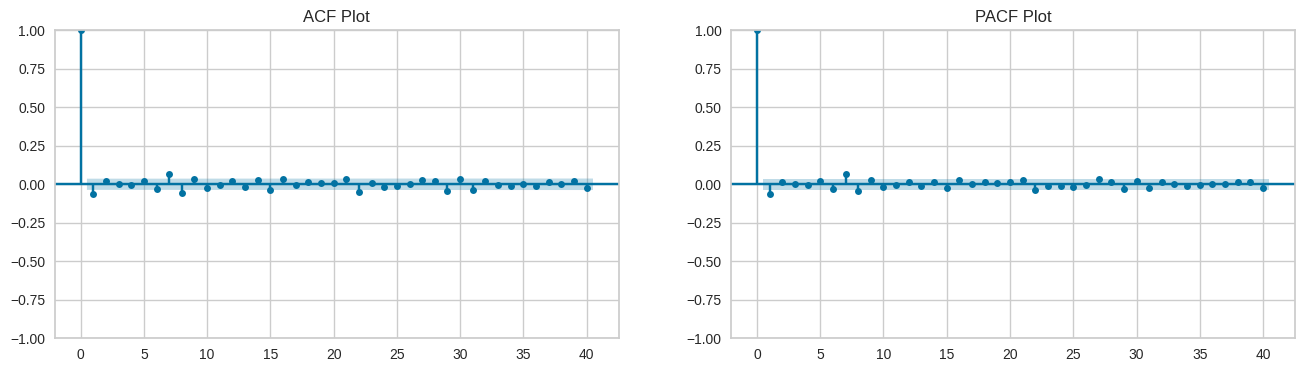

In [45]:
# Ploting ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(nvidia_data['log_diff_Close'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('ACF Plot')

# PACF plot
plot_pacf(nvidia_data['log_diff_Close'].dropna(), lags=40, ax=axes[1])
axes[1].set_title('PACF Plot')

plt.show()

* ACF Plot: The autocorrelations drop off sharply after lag 1 and remain within the confidence intervals for most subsequent lags. This indicates that the differenced series is likely stationary.

* PACF Plot: The partial autocorrelations also drop off sharply after lag 1 and remain within the confidence intervals for most subsequent lags, suggesting stationarity.

Now to perform ARIMA we have our params

* Differencing (d): Since the series became stationary after first differencing, d=1.

* Autoregressive (p): The PACF plot shows a significant spike at lag 1 and cuts off sharply, suggesting p=1.

* Moving Average (q): The ACF plot shows a significant spike at lag 1 and cuts off sharply, suggesting q=1.

Lets import the library to perform ARIMA

In [46]:
from statsmodels.tsa.arima.model import ARIMA

We will perfom it on Log Adj Close Price with d=1

In [47]:
# Fiting the  ARIMA model on log-transformed series
# p,q = 1,1
#d=1 from ndifss
model = ARIMA(nvidia_data['log_Close'], order=(1, 1, 1))
fit_model = model.fit()

# Print model summary
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:              log_Close   No. Observations:                 2915
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6278.913
Date:                Thu, 18 Jul 2024   AIC                         -12551.827
Time:                        07:17:31   BIC                         -12533.895
Sample:                             0   HQIC                        -12545.367
                               - 2915                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3275      0.230     -1.421      0.155      -0.779       0.124
ma.L1          0.2740      0.236      1.162      0.245      -0.188       0.736
sigma2         0.0008   9.26e-06     84.961      0.0

The ARIMA(1, 1, 1) model on the log-transformed series provides a reasonable fit with low AIC and BIC values.

However, neither the AR(1) nor the MA(1) term is statistically significant as p>0.05 which may suggest that a different model specification could be more appropriate.

We need to explore different ARIMA model specifications to improve the fit. Thus we can use auto_arima from pmdarima to find the best ARIMA model parameters automatically.

## Auto ARIMA

Using Auto Arima to get the best Parameters

In [48]:
from pmdarima import auto_arima

When using auto_arima, it is generally best to provide the function with the original series. The auto_arima function can automatically determine the appropriate order of differencing (d) along with the p and q values. This approach leverages the power of auto_arima to find the best model for the data without manual preprocessing steps. [Auto ARIMA](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)

In [49]:
auto_arima_original = auto_arima(nvidia_data['Adj Close'].dropna(),
                        start_p=0, start_q=0,  # Initial guess for the ARIMA order
                        max_p=3, max_q=3,  # Maximum p and q
                        seasonal=False,  # No seasonality for this example
                        trace=True,  # Print status on the fits
                        error_action='ignore',  # Don't want to know if an order does not work
                        suppress_warnings=True,  # Suppress warnings
                        stepwise=True)  # Stepwise search to find the best model

# Displaying the summary of the model
print(auto_arima_original.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8244.584, Time=1.19 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=7548.601, Time=0.92 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=6276.610, Time=4.34 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8242.590, Time=0.56 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=6278.589, Time=10.79 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.63 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.62 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=6276.285, Time=1.40 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=6278.261, Time=3.13 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=6278.256, Time=5.65 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=7546.619, Time=0.61 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=6257.332, Time=4.95 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=6262.180, Time=3.95 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=6253.323, Time=7.33 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC

he best model identified was ARIMA(0, 2, 3) with an AIC of 6251.336. This model includes three moving average terms (MA) and no autoregressive terms (AR), with all MA coefficients being highly significant.

Despite these residual issues, the ARIMA(0, 2, 3) model provides a good fit for forecasting purposes.

Fitting the Model

In [50]:
# Fiting the ARIMA model on log-transformed series
model = ARIMA(nvidia_data['Adj Close'].dropna(), order=(0, 2, 3))
fit_model = model.fit()

# Printing model summary
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2915
Model:                 ARIMA(0, 2, 3)   Log Likelihood               -3121.668
Date:                Thu, 18 Jul 2024   AIC                           6251.336
Time:                        07:18:48   BIC                           6275.244
Sample:                             0   HQIC                          6259.949
                               - 2915                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9944      0.007   -152.130      0.000      -1.007      -0.982
ma.L2         -0.0999      0.009    -11.659      0.000      -0.117      -0.083
ma.L3          0.1089      0.004     24.324      0.0

Forcasting with ARIMA

In [51]:
# Forecasting future values of the original series
forecast_steps = 30  # Number of steps to forecast
forecast = fit_model.forecast(steps=forecast_steps)

forecast_original = forecast

# Creating a date range for the forecast
forecast_dates = pd.date_range(start=nvidia_data.index[-1], periods=forecast_steps+1)

# Printing the forecasted values
print("Forecasted Values (Original Scale):")
for date, value in zip(forecast_dates, forecast_original):
    print(f"{date.date()}: {value}")

Forecasted Values (Original Scale):
2024-06-21: 127.88878123372814
2024-06-22: 129.04004991740084
2024-06-23: 129.69668574251176
2024-06-24: 130.3533215676227
2024-06-25: 131.0099573927336
2024-06-26: 131.66659321784454
2024-06-27: 132.32322904295546
2024-06-28: 132.9798648680664
2024-06-29: 133.6365006931773
2024-06-30: 134.29313651828824
2024-07-01: 134.94977234339916
2024-07-02: 135.6064081685101
2024-07-03: 136.263043993621
2024-07-04: 136.91967981873194
2024-07-05: 137.57631564384286
2024-07-06: 138.2329514689538
2024-07-07: 138.8895872940647
2024-07-08: 139.54622311917564
2024-07-09: 140.20285894428656
2024-07-10: 140.8594947693975
2024-07-11: 141.5161305945084
2024-07-12: 142.17276641961934
2024-07-13: 142.82940224473026
2024-07-14: 143.4860380698412
2024-07-15: 144.1426738949521
2024-07-16: 144.79930972006304
2024-07-17: 145.45594554517396
2024-07-18: 146.1125813702849
2024-07-19: 146.7692171953958
2024-07-20: 147.42585302050674


In [52]:
# Creating Plotly plot
fig = go.Figure()

# Adding original close price
fig.add_trace(go.Scatter(x=nvidia_data.index, y=nvidia_data['Adj Close'], mode='lines', name='Adj Close Price'))

# Adding forecasted values (original scale)
fig.add_trace(go.Scatter(x=forecast_dates, y=forecast_original, mode='lines', name='Forecast', line=dict(color='red')))

# Updating layout
fig.update_layout(
    title='ARIMA(0, 2, 3) Forecast on Original Scale',
    xaxis_title='Date',
    yaxis_title='Adjusted Close Price',
    showlegend=True
)

# Show plot
fig.show()

The blue line represents the historical adjusted close prices, while the red line shows the forecasted values. The model selection was based on minimizing the Akaike Information Criterion (AIC), resulting in an AIC of 6251.336. Despite the model's good fit, residual diagnostics indicated non-normality and heteroskedasticity. The forecast shows a continuation of the recent upward trend in NVIDIA's stock prices. Confidence intervals were plotted but need adjustment to accurately reflect forecast uncertainty.

## Ndiffs vs Auto ARIMA

**auto_arima**

> Methodology: The auto_arima function uses a combination of statistical tests and information criteria (like AIC or BIC) to find the best combination of ARIMA parameters (p, d, q).

> Differencing (d): auto_arima assesses different values of d by fitting models and comparing their performance. It aims to minimize the information criteria, leading to the selection of the differencing order that best fits the entire model.

**[ndiffs](https://pkg.robjhyndman.com/forecast/reference/ndiffs.html)**

> Methodology: The ndiffs function typically uses statistical tests such as the Augmented Dickey-Fuller (ADF) test, KPSS test, or PP test to determine the number of differences required to achieve stationarity.

> Focus: These tests specifically target the presence of a unit root in the series. The goal is to find the minimum number of differences needed to make the series stationary based on these tests.

Criteria Differences:

> auto_arima: May prefer a higher order of differencing (d=2) to achieve a better fit in terms of information criteria, even if the series appears stationary after one difference. This is because it considers the overall model performance including AR and MA terms.

> ndiffs: Focuses purely on statistical tests for stationarity, which might indicate that the series is stationary after one difference (d=1).

# Change Point Analysis

> Change Point Analysis involves identifying points in time where the statistical properties of a time series change. These changes can indicate significant shifts in the underlying process generating the data, such as market regime shifts, policy changes, or other structural changes.

References :

1. [Change Point Detection in Time Series](https://medium.com/@sztistvan/change-point-detection-in-time-series-using-chatgpt-22cc9172a130)
2. [CPD in TS with Python](https://forecastegy.com/posts/change-point-detection-time-series-python/)
3. [Python’s Change Point Detection Tools](https://medium.datadriveninvestor.com/maximize-your-time-series-analysis-with-pythons-change-point-detection-tools-39ce2bc63be)
5. [Changepoint Analysis with PELT ](https://github.com/jcmuddle/nag4py_changepoint_pelt_mongodb/blob/master/nag4py_changepoint_pelt.ipynb)
6. [Change Point Detection](https://www.kaggle.com/code/yejining99/change-point-detection)
7. [BEAST: A Bayesian Ensemble Algorithm for Change-Point Detection and Time Series Decomposition](https://it.mathworks.com/matlabcentral/fileexchange/72515-bayesian-changepoint-detection-time-series-decomposition)
8. [Rbeast](https://pypi.org/project/Rbeast/)
9. [Change Point Detection methods applied to Financial Time Series](https://www.yu.edu/sites/default/files/inline-files/Research%20report%20document_0.pdf)


## ARMA Residuals

**What are the change points in ARIMA model residuals?**

We try to identify changes in the underlying noise or variability after accounting for the overall trend and seasonal patterns. It helps to pinpoint periods of abnormal volatility or structural breaks that are not captured by the model's trend.

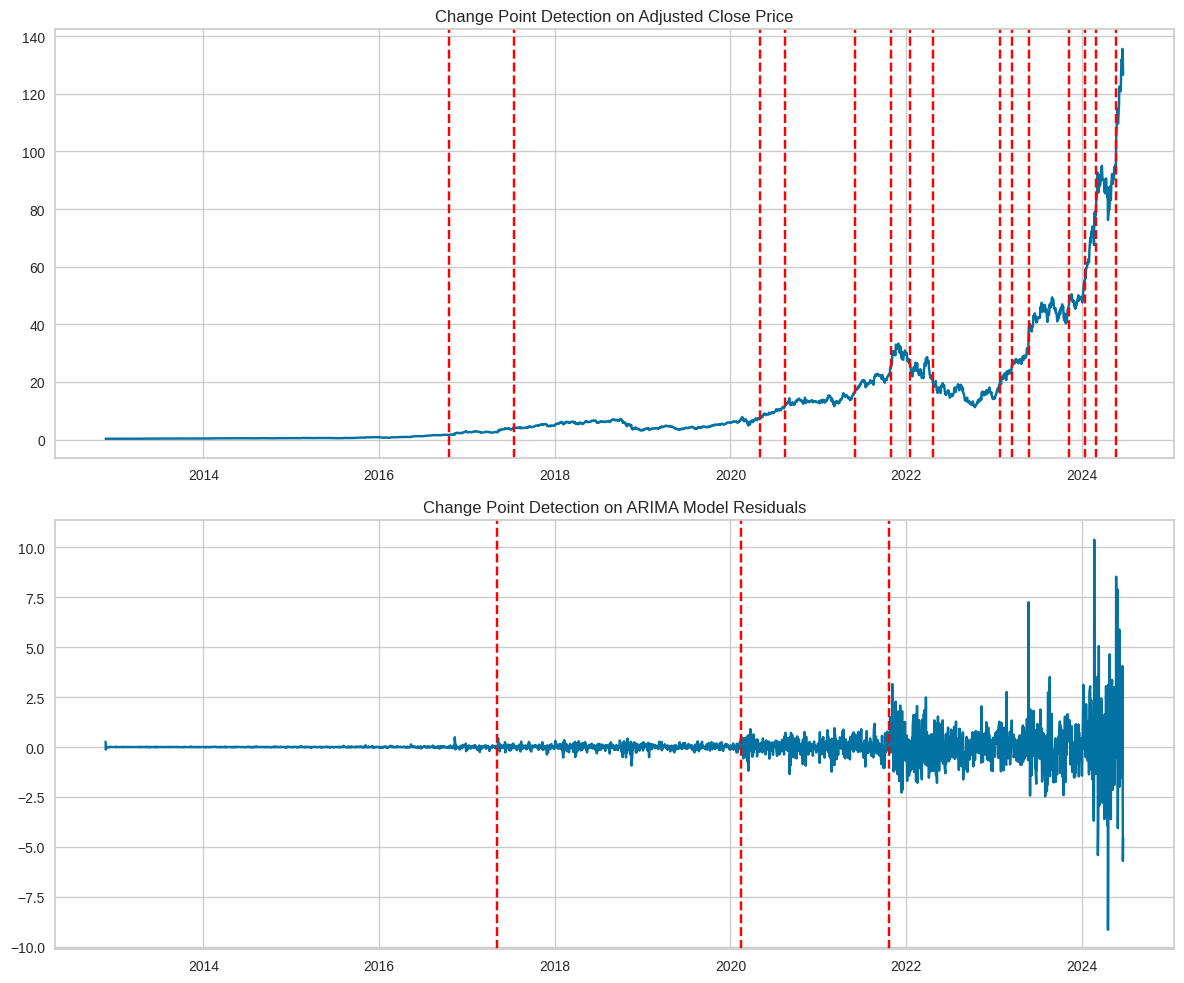

In [53]:
#Function to perform change point analysis on Adjusted Close Price
def change_point_analysis(series, model_order=(0, 2, 3), pen=10):
    # Fit ARIMA model to get residuals
    model = ARIMA(series.dropna(), order=model_order)
    fit_model = model.fit()
    residuals = fit_model.resid

    # Change point detection on Adjusted Close Price
    algo = rpt.Pelt(model="rbf").fit(series.dropna().values)
    result = algo.predict(pen=pen)

    # Ploting results
    fig, ax = plt.subplots(2, 1, figsize=(12, 10))

    # Ploting change points on Adjusted Close Price
    ax[0].plot(series)
    for cp in result:
        if cp < len(series):  # Ensure the index is within bounds
            ax[0].axvline(series.index[cp], color='red', linestyle='--')
    ax[0].set_title('Change Point Detection on Adjusted Close Price')

    # Change point detection on ARIMA residuals
    algo_res = rpt.Pelt(model="rbf").fit(residuals.values)
    result_res = algo_res.predict(pen=pen)

    # Ploingt change points on residuals
    ax[1].plot(series.index, residuals)
    for cp in result_res:
        if cp < len(series):  # Ensure the index is within bounds
            ax[1].axvline(series.index[cp], color='red', linestyle='--')
    ax[1].set_title('Change Point Detection on ARIMA Model Residuals')

    plt.tight_layout()
    plt.show()

change_point_analysis(nvidia_data['Adj Close'], model_order=(0, 2, 3), pen=10)


The analysis on ARIMA model residuals identifies 3 critical points where the volatility or the underlying patterns of the residuals change.

## Dynamic Change Point

**Are there significant change points in the series?**

Dynp optimizes the segmentation globally, ensuring the best possible change points are found. It’s computationally intensive but precise.

[Dyn Change Point Detection](https://www.kaggle.com/code/yejining99/change-point-detection)

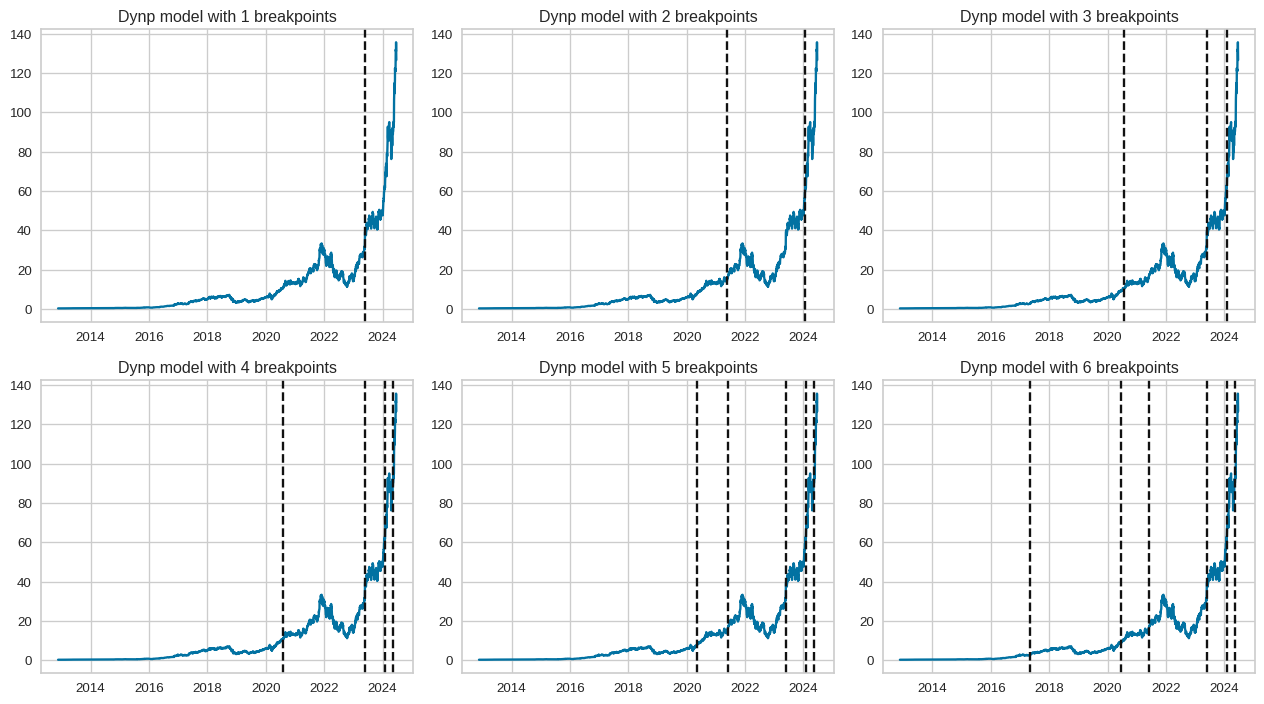

In [54]:
# function for dynamic programming change point analysis
def dynamic_change_point_analysis(series, model="l2", min_size=28, max_bkps=6):
    fig, ax = plt.subplots(2, 3, figsize=(1280/96, 720/96), dpi=96)
    ax = ax.ravel()

    algo = rpt.Dynp(model=model, min_size=min_size)
    algo.fit(series.dropna().values)

    for i, n_bkps in enumerate(range(1, max_bkps + 1)):
        result = algo.predict(n_bkps=n_bkps)
        ax[i].plot(series.index, series.values)
        for bkp in result:
            if bkp < len(series):  # Ensure the index is within bounds
                ax[i].axvline(x=series.index[bkp], color='k', linestyle='--')
        ax[i].set_title(f"Dynp model with {n_bkps} breakpoints")

    plt.tight_layout()
    plt.show()

dynamic_change_point_analysis(nvidia_data['Adj Close'])

## PELT

Efficient for detecting multiple change points.

PELT (Pruned Exact Linear Time)
 [Optimal detection of Changepoints](https://arxiv.org/abs/1101.1438)

In the context of the Pelt algorithm for change point detection, the penalty value is a parameter used to control the sensitivity of the algorithm to detect change points. A higher penalty value means fewer change points will be detected, focusing only on significant changes, while a lower penalty value will result in more detected change points, including smaller fluctuations. It helps balance between overfitting and underfitting the model to the data.

At First lets set pen=10 and then compare with pen=100

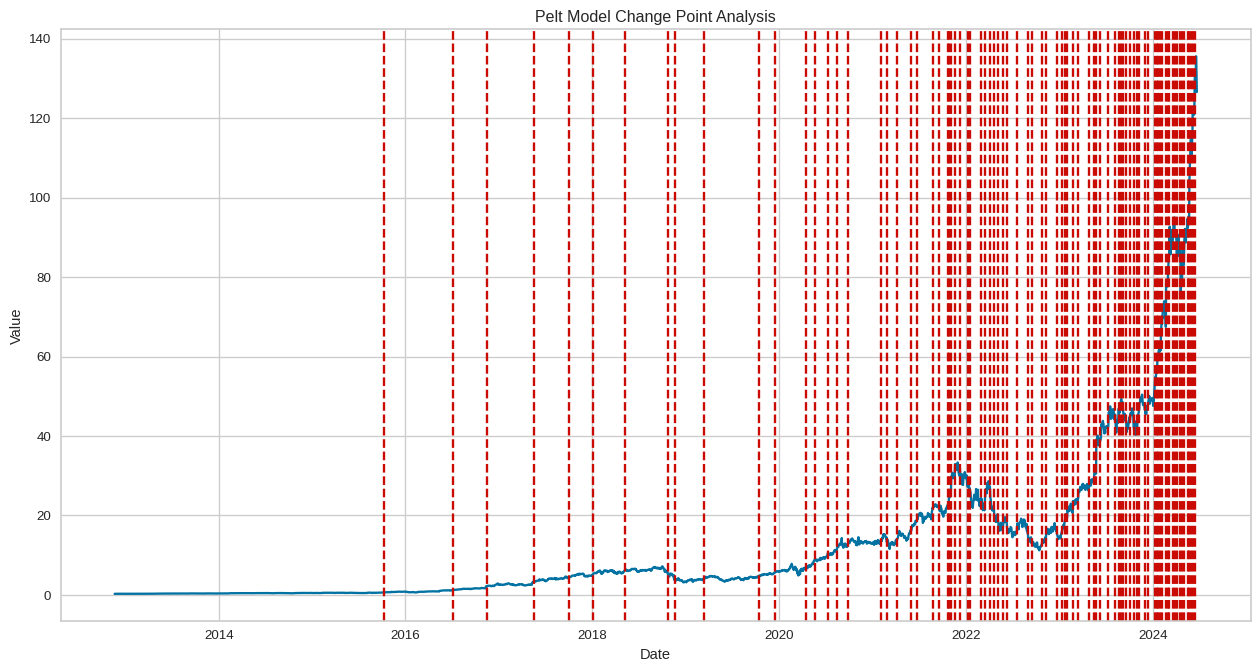

In [55]:
#Pelt model change point analysis function
def pelt_change_point_analysis(series, model="l2", min_size=28):
    fig, ax = plt.subplots(figsize=(16, 8), dpi=96)

    algo = rpt.Pelt(model=model).fit(series.dropna().values)
    result = algo.predict(pen=10)

    ax.plot(series.index, series.values, label='Time Series')

    for bkp in result:
        if bkp < len(series):  # Ensure the index is within bounds
            ax.axvline(x=series.index[bkp], color='r', linestyle='--', label='Change Point')

    ax.set_title(f"Pelt Model Change Point Analysis")
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')

    plt.show()

pelt_change_point_analysis(nvidia_data['Adj Close'])

The Pelt model identifies multiple change points in Nvidia's adjusted close price series, suggesting frequent structural shifts. Using a penalty value of 10, the model marks numerous points, particularly dense post-2018. This indicates significant volatility and rapid changes in the stock price

## Binary Segmentation

Splits the data recursively to identify change points.

Code Reference: [CPD in TS with Python](https://forecastegy.com/posts/change-point-detection-time-series-python/)

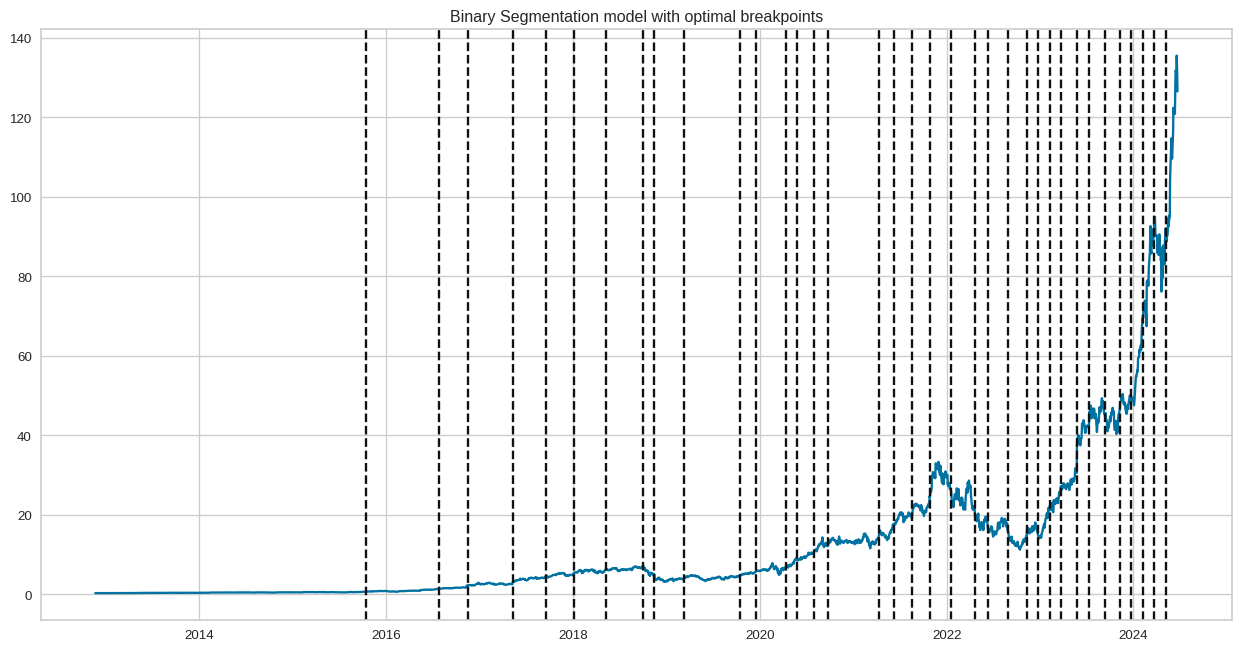

In [56]:
# Binary segmentation change point analysis function
def binary_segmentation_change_point_analysis(series, model="l2", min_size=28):
    fig, ax = plt.subplots(figsize=(16, 8), dpi=96)

    algo = rpt.Binseg(model=model, min_size=min_size)
    algo.fit(series.dropna().values)
    result = algo.predict(pen=np.log(len(series)))

    ax.plot(series.index, series.values)
    for bkp in result:
        if bkp < len(series):  # Ensure the index is within bounds
            ax.axvline(x=series.index[bkp], color='k', linestyle='--')
    ax.set_title(f"Binary Segmentation model with optimal breakpoints")

    plt.show()

binary_segmentation_change_point_analysis(nvidia_data['Adj Close'])


The Binary Segmentation model also  identifies numerous change points in Nvidia's adjusted close price data, starting from late 2015 onwards.

## Window Based

Slides a window across the time series and detects changes within each window.

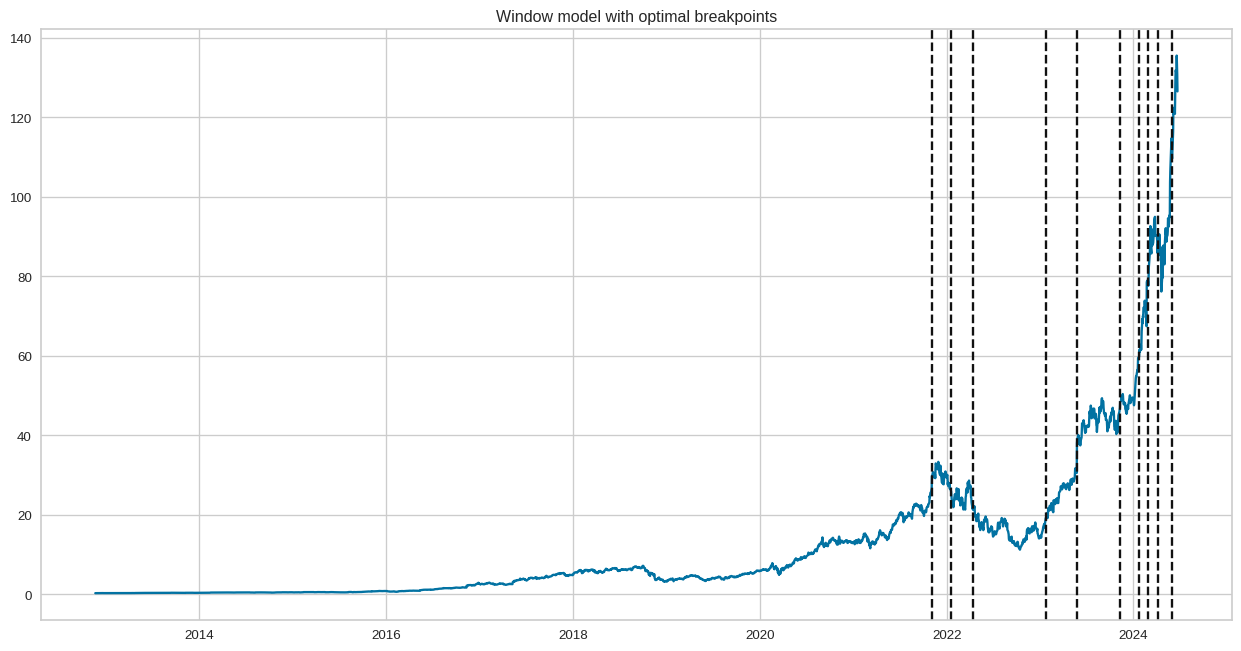

In [57]:
# Wndow-based change point analysis function
def window_change_point_analysis(series, model="l2", width=28):
    fig, ax = plt.subplots(figsize=(16, 8), dpi=96)

    algo = rpt.Window(model=model, width=width)
    algo.fit(series.dropna().values)
    result = algo.predict(pen=np.log(len(series)))

    ax.plot(series.index, series.values)
    for bkp in result:
        if bkp < len(series):
            ax.axvline(x=series.index[bkp], color='k', linestyle='--')
    ax.set_title(f"Window model with optimal breakpoints")

    plt.show()

window_change_point_analysis(nvidia_data['Adj Close'])


The Window-Based model identifies change points in starting  from 2021 onwards.

## Bottom - Up

Starts with many small segments and merges them iteratively to form larger segments until no more changes are detected.

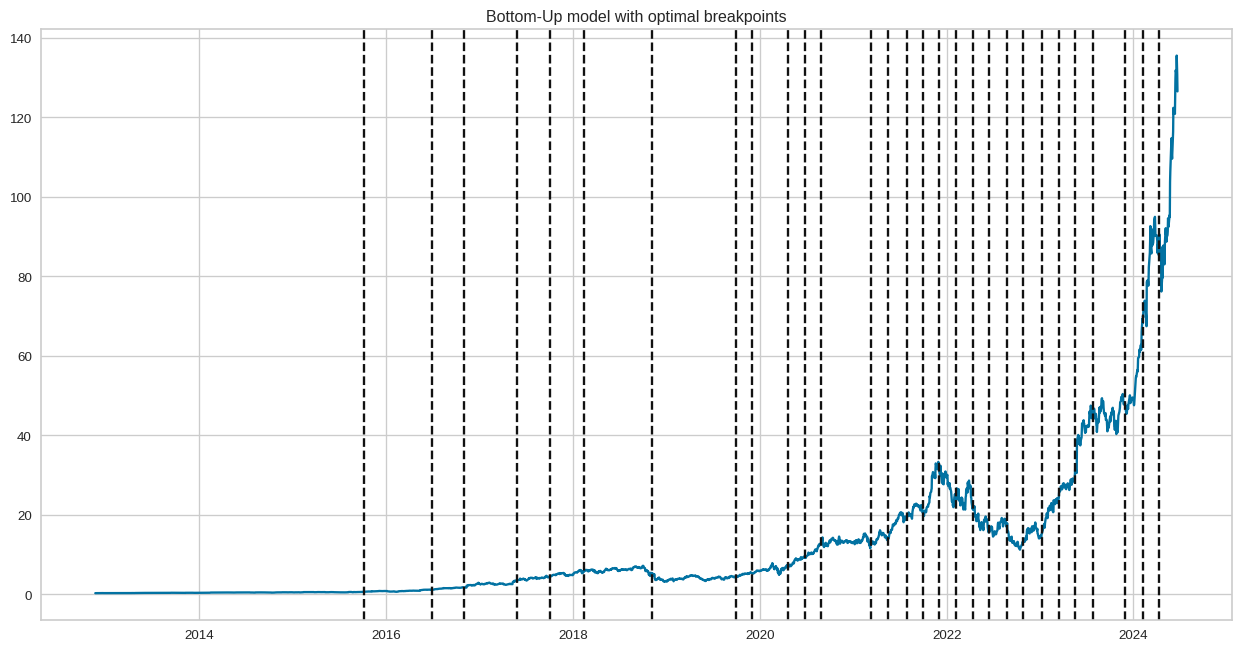

In [58]:
# Bottom-up change point analysis function
def bottom_up_change_point_analysis(series, model="l2", min_size=28):
    fig, ax = plt.subplots(figsize=(16, 8), dpi=96)

    algo = rpt.BottomUp(model=model, min_size=min_size)
    algo.fit(series.dropna().values)
    result = algo.predict(pen=np.log(len(series)))

    ax.plot(series.index, series.values)
    for bkp in result:
        if bkp < len(series):
            ax.axvline(x=series.index[bkp], color='k', linestyle='--')
    ax.set_title(f"Bottom-Up model with optimal breakpoints")

    plt.show()

bottom_up_change_point_analysis(nvidia_data['Adj Close'])

Similar to PELT and Binary, Bottom up detects change points starting late 2015

## BEAST

 [Bayesian Estimator of Abrupt change, Seasonality, and Trend](https://pypi.org/project/Rbeast/)

Rbeast is a robust Bayesian tool designed for change point detection and time series decomposition. It allows for the identification of abrupt changes, trends, and seasonal patterns in time series data. This tool is particularly useful for applications in finance

Let's install the package

In [59]:
!pip install Rbeast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.6 MB/s eta 0:00:00


import it for the use

In [60]:
import Rbeast as rb

now when the beast function is called to identify the chang points it also fits a suitable model on the data (we can scroll over beast to see the source)


INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 2915
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  1 (unknown unit)
hasSeasonCmpnt: False | no periodic or seasonal component. The model Y=Trend+Error is fitted.
HasOutlierCmpt: False | If true, Y=Trend+Outlier+Error (experimental) is fitted instead of Y=Trend+Error 
Detrend       : False |

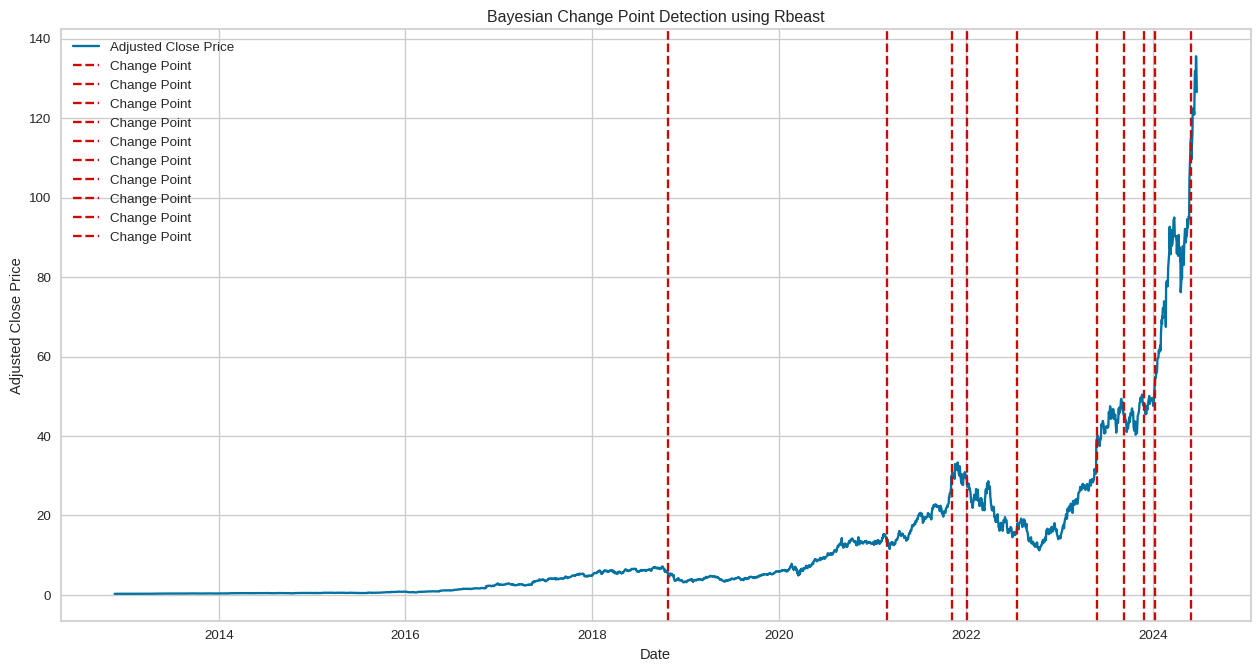

In [61]:
adj_close = nvidia_data['Adj Close']

# Normalizing the data (optional but recommended for better performance)
adj_close_normalized = (adj_close - np.mean(adj_close)) / np.std(adj_close)

# Performing Bayesian change point detection using Rbeast
result = rb.beast(adj_close_normalized.values, start=1, season='none')

# Extracting change points
change_points = result.trend.cp

fig, ax = plt.subplots(figsize=(16, 8), dpi=96)

# Ploting the original time series data
ax.plot(adj_close.index, adj_close.values, label='Adjusted Close Price')

# Ploting the detected change points
for cp in change_points:
    ax.axvline(x=adj_close.index[int(cp)], color='r', linestyle='--', label='Change Point')

ax.set_title("Bayesian Change Point Detection using Rbeast")
ax.set_xlabel("Date")
ax.set_ylabel("Adjusted Close Price")
ax.legend()


plt.show()



Along with change points a brief summary of the input data was provide by Rbeast model. The number ofdetected change points are comparitively low.

According to it, the data is regular and ordered and the model is  Y= trend +error.

## Comparision

In change point detection, the best model is typically determined by a combination of BIC value and the number of change points

Lets compare the models based BIC to find which one suit our data the best

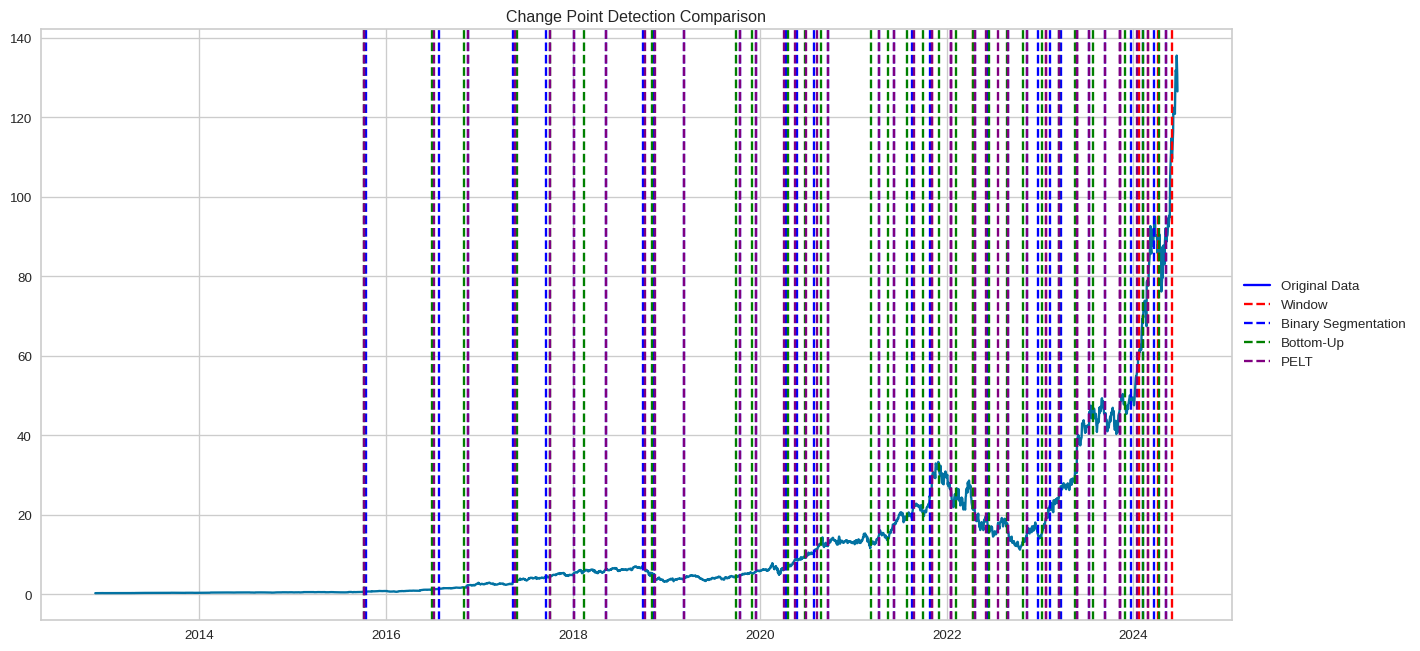

            Model Name    BIC Value  Number of Change Points
0               Window  3248.608472                       10
1  Binary Segmentation  4435.890747                       36
2            Bottom-Up  6357.538464                       29
3                 PELT  4103.621304                       36


In [62]:
# function to compute the BIC
def compute_bic(model, series, breakpoints):
    n = len(series)
    k = len(breakpoints) - 1  # Number of segments
    rss = sum(np.var(series[breakpoints[i]:breakpoints[i + 1]]) * (breakpoints[i + 1] - breakpoints[i])
              for i in range(k))
    bic = n * np.log(rss / n) + k * np.log(n)
    return bic

#  function to compare change point detection models
def compare_change_point_models(series, model="l2", min_size=28, width=28):
    # Initialize models
    models = {
        "Window": rpt.Window(model=model, width=width),
        "Binary Segmentation": rpt.Binseg(model=model, min_size=min_size),
        "Bottom-Up": rpt.BottomUp(model=model, min_size=min_size),
        "PELT": rpt.Pelt(model=model, min_size=min_size)
    }

    fig, ax = plt.subplots(figsize=(16, 8), dpi=96)
    ax.plot(series.index, series.values, label='Original Data')

    colors = {'Window': 'red', 'Binary Segmentation': 'blue', 'Bottom-Up': 'green', 'PELT': 'purple'}

    # Fit each model, calculate BIC, and count change points
    bic_scores = {}
    change_point_counts = {}
    for name, algo in models.items():
        algo.fit(series.dropna().values)
        result = algo.predict(pen=np.log(len(series)))
        bic_scores[name] = compute_bic(algo, series.dropna().values, result)
        change_point_counts[name] = len(result) - 1

        # Plot breakpoints
        for bkp in result:
            if bkp < len(series):  # Ensure the index is within bounds
                ax.axvline(x=series.index[bkp], linestyle='--', color=colors[name])

    # Add legend outside the plot
    handles = [plt.Line2D([0], [0], color='blue', linestyle='-', label='Original Data'),
               plt.Line2D([0], [0], color='red', linestyle='--', label='Window'),
               plt.Line2D([0], [0], color='blue', linestyle='--', label='Binary Segmentation'),
               plt.Line2D([0], [0], color='green', linestyle='--', label='Bottom-Up'),
               plt.Line2D([0], [0], color='purple', linestyle='--', label='PELT')]
    ax.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title("Change Point Detection Comparison")
    plt.show()

    # Print BIC scores and number of change points in a tabulated format
    results = []
    for name in models.keys():
        results.append([name, bic_scores[name], change_point_counts[name]])

    # Creating a DataFrame
    results_df = pd.DataFrame(results, columns=['Model Name', 'BIC Value', 'Number of Change Points'])

    # printing the DataFrame
    print(results_df)

compare_change_point_models(nvidia_data['Adj Close'])


\Progress:100.0% done[==============================================================]
BIC for Rbeast: -3037.3906350564384
Number of Change Points detected: 9


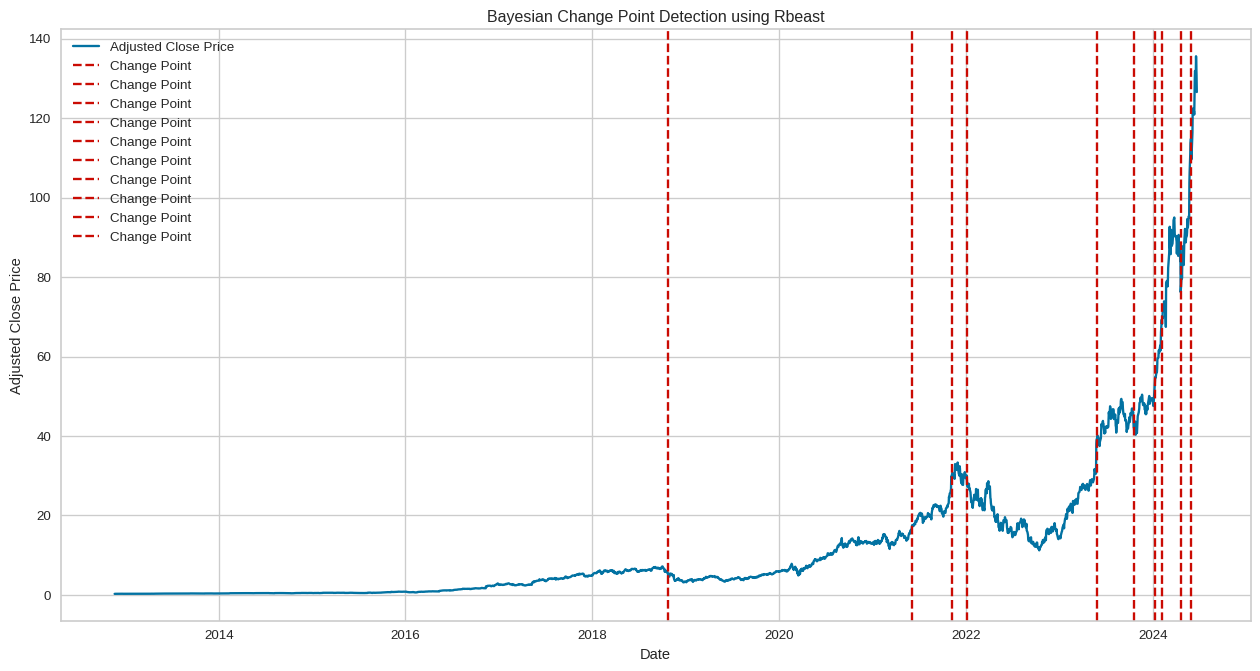

In [63]:

#function to compute the BIC for Rbeast
def compute_bic_rbeast(series, change_points):
    n = len(series)
    k = len(change_points) - 1  # Number of segments
    change_points = [int(cp) for cp in change_points]  # Ensure change points are integers

    rss = 0
    for i in range(k):
        segment = series[change_points[i]:change_points[i + 1]]
        if len(segment) > 1:  # Ensure segment length is valid
            rss += np.var(segment) * len(segment)

    if rss == 0:
        return np.nan  # Avoid division by zero

    bic = n * np.log(rss / n) + k * np.log(n)
    return bic

# Performing Bayesian change point detection using Rbeast with suppressed messages
adj_close = nvidia_data['Adj Close']
adj_close_normalized = (adj_close - np.mean(adj_close)) / np.std(adj_close)
result_rbeast = rb.beast(adj_close_normalized.values, start=1, season='none', quiet=1, extra={'printOptions': 0})

# Extracting change points
change_points_rbeast = result_rbeast.trend.cp

# Computing BIC for Rbeast
bic_rbeast = compute_bic_rbeast(adj_close_normalized.values, change_points_rbeast)

# Printing BIC and number of change points detected
num_change_points = len(change_points_rbeast) - 1
print(f"BIC for Rbeast: {bic_rbeast}")
print(f"Number of Change Points detected: {num_change_points}")

fig, ax = plt.subplots(figsize=(16, 8), dpi=96)
ax.plot(adj_close.index, adj_close.values, label='Adjusted Close Price')
for cp in change_points_rbeast:
    ax.axvline(x=adj_close.index[int(cp)], color='r', linestyle='--', label='Change Point')
ax.set_title("Bayesian Change Point Detection using Rbeast")
ax.set_xlabel("Date")
ax.set_ylabel("Adjusted Close Price")
ax.legend()
plt.show()


Rbeast has the lowest BIC value (-2577.71) and a moderate number of change points (9), suggesting it might be the best model for detecting change points on our Adjclose price data.

Let's try to find the exaxt dates these changes were detected to see the effects of external faactorson our Adj closing price.

In [64]:
change_points = result.trend.cp # extracting change points

# Converting the change points to dates
change_point_dates = [nvidia_data.index[int(cp)] for cp in change_points]

# Creating a DataFrame to display the change point number and date
change_points_df = pd.DataFrame({
    "Change Point Number": range(1, len(change_point_dates) + 1),
    "Date": change_point_dates
})

print(change_points_df)


   Change Point Number       Date
0                    1 2024-01-11
1                    2 2021-11-05
2                    3 2018-10-24
3                    4 2022-01-06
4                    5 2024-05-29
5                    6 2023-05-26
6                    7 2023-11-27
7                    8 2023-09-12
8                    9 2022-07-20
9                   10 2021-02-26


Based on the above dates for the future work on the time series we can verify what caused the change.

# Concept of Returns and Log Returns

> In financial time series analysis, returns and log returns are commonly used to analyze and model the behavior of asset prices. They help in normalizing the data, reducing heteroscedasticity, and providing a stationary series suitable for modeling.

# Returns

> Returns represent the percentage change in the price of an asset from one period to the next. They are a fundamental measure used in finance to evaluate the performance of an investment over time. Returns can be calculated on various time scales, such as daily, weekly, monthly, or annually.

## Calculating Returns

Analysis on returns provides us with the understanding on stocks performance.

Code references:

* [Calculating Stock returns](https://www.codingfinance.com/post/2018-04-03-calc-returns-py/)

* [ANALYZING STOCK RETURNS AND VOLATILITY WITH PYTHON](https://labs.sogeti.com/analyzing-stock-returns-and-volatility-with-python/)

In [65]:
nvidia_data['Returns'] = nvidia_data['Adj Close'].pct_change() #Daily Returns can be coded for monthly as well

Multiplying returns by 100 to make thevalues more interpretable without affecting the statistical properties

In [66]:
#To have a good scale multiplying the Returns by 100
returns=nvidia_data['Returns']*100
scaled_returns = returns.dropna()

In [67]:
nvidia_data

Adj Close  log_Close  log_diff_Close   Returns
Date                                                       
2012-11-20    0.265173  -1.327373             NaN       NaN
2012-11-21    0.272789  -1.299057        0.028316  0.028721
2012-11-23    0.274636  -1.292309        0.006748  0.006771
2012-11-26    0.279482  -1.274817        0.017491  0.017645
2012-11-27    0.280636  -1.270697        0.004121  0.004129
...                ...        ...             ...       ...
2024-06-14  131.880005   4.881892        0.017363  0.017514
2024-06-17  130.979996   4.875045       -0.006848 -0.006824
2024-06-18  135.580002   4.909562        0.034517  0.035120
2024-06-20  130.779999   4.873517       -0.036045 -0.035403
2024-06-21  126.570000   4.840796       -0.032721 -0.032191

[2915 rows x 4 columns]

In [68]:
nvidia_data['Returns'].describe()

count    2914.000000
mean        0.002514
std         0.028259
min        -0.187559
25%        -0.010784
50%         0.002107
75%         0.015570
max         0.298067
Name: Returns, dtype: float64

In [69]:
dates = nvidia_data.index
returns = nvidia_data['Returns']

fig = go.Figure()

fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0.3, y1=0,
              line=dict(color="rgba(51, 204, 51, 0.3)"))
fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0, y1=-0.2,
              line=dict(color="rgba(204, 51, 51, 0.3)"))

fig.add_trace(go.Scatter(x=dates[1:], y=returns[1:], mode='lines', name='Daily Returns'))

fig.update_layout(
    title="Nvidia Stock Daily Returns",
    xaxis_title="Date",
    yaxis_title="Returns",
    font=dict(size=20),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True),
    width=1800,
    height=600
)

fig.show()


From 2012 to 2024, while the returns are generally centered around zero, there are periods of increased volatility, particularly around 2016 and 2020.

The mean return appears to be relatively constant, but the variance seems to change over time, suggesting some periods of higher volatility.

This changing variance could be indicative of heteroskedasticity, which might require models like GARCH for better volatility forecasting.

This plot is crucial for understanding the volatility and risk associated with Nvidia's stock. The daily returns provide insights into the stock's performance and highlight periods of significant market activity. Such an analysis is fundamental for risk management, investment decisions, and further modeling efforts, such as volatility modeling with GARCH.

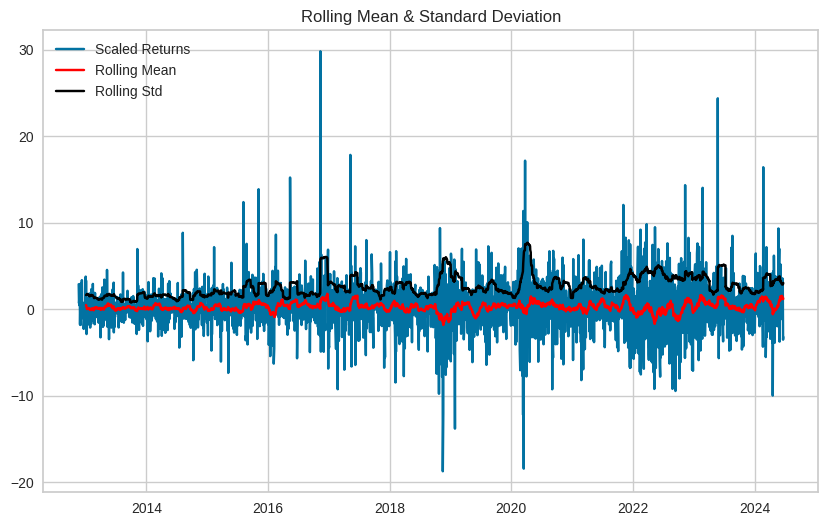

In [70]:
# Rolling mean and standard deviation
rolling_mean = scaled_returns.rolling(window=30).mean()
rolling_std = scaled_returns.rolling(window=30).std()

# Plotting rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(scaled_returns, label='Scaled Returns')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

## Stationarity Test

**Is the Returns data stationary?**

In [71]:
print(" ADF Test on Returns:")
adf_test(scaled_returns)

print("\n KPSS Test on Returns:")
kpss_test(scaled_returns)

print("\n PP Test on Returns:")
pp_test(scaled_returns)

 ADF Test on Returns:
ADF Statistic: -19.122404694941782
p-value: 0.0
Critical Value (1%): -3.432602266252907
Critical Value (5%): -2.8625351003877864
Critical Value (10%): -2.5672997201035046

 KPSS Test on Returns:
KPSS Statistic: 0.19439156626181175
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739

 PP Test on Returns:
     Phillips-Perron Test (Z-tau)    
Test Statistic                -57.328
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## Ljung-Box test

>  The Ljung-Box test is a statistical test used to determine whether there are any significant autocorrelations in a time series. It is particularly useful for checking the randomness of residuals in a time series model, such as ARMA or GARCH, to ensure that the model has adequately captured the patterns in the data.

**Null Hypothesis:** The data (or residuals) are independently distributed (no autocorrelation).

**Alternative Hypothesis:** The data (or residuals) exhibit autocorrelation.

We are now performing Ljung Box Test nn the Returns to check if the returns exhibit significant autocorrelation.

In [72]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [73]:
# Ljung-Box Test
ljung_box_results = acorr_ljungbox(scaled_returns, lags=[10], return_df=True)
print(ljung_box_results)

      lb_stat  lb_pvalue
10  43.620284   0.000004


The Ljung-Box test results are significant (p-value < 0.05), indicating that there is autocorrelation in the returns series up to lag 10.

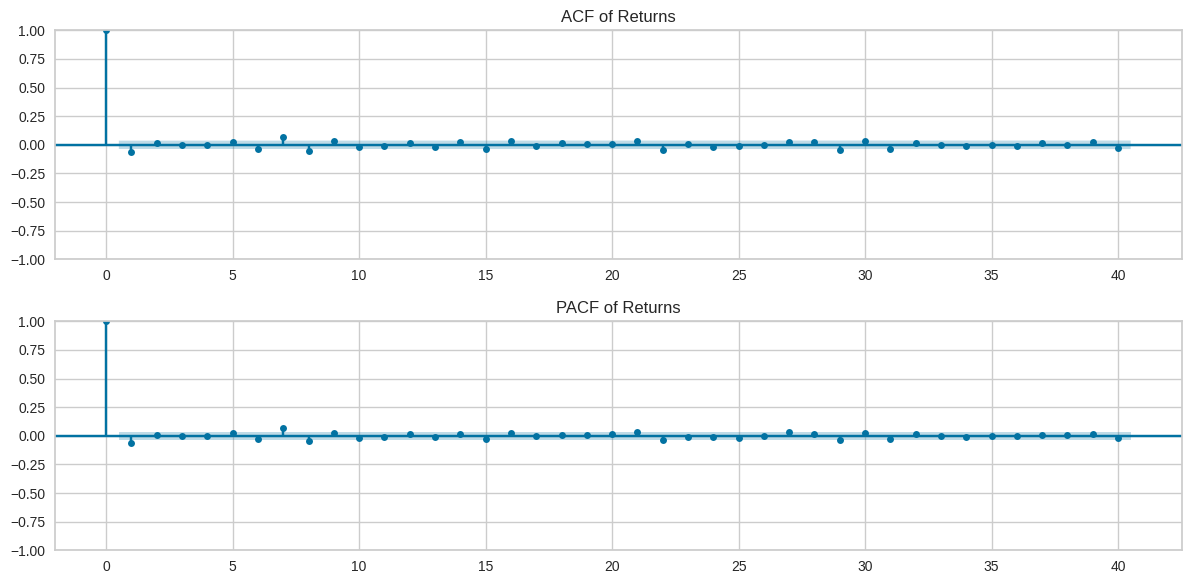

In [74]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(scaled_returns, lags=40, ax=plt.gca())
plt.title('ACF of Returns')
plt.subplot(212)
plot_pacf(scaled_returns, lags=40, ax=plt.gca())
plt.title('PACF of Returns')
plt.tight_layout()
plt.show()

ACF Plot: Shows significant autocorrelation at lag 1 and then quickly drops off, indicating minimal autocorrelation at higher lags.

PACF Plot: Also shows a significant spike at lag 1, suggesting that the returns series has some autocorrelation at this lag.

Given that both the ACF/PACF plots and the Ljung-Box test indicate the presence of autocorrelation in the returns series so we can try applying an ARIMA model

## Normality Tests

Simple returns represent the raw percentage changes in asset prices. They are intuitive and directly reflect the changes in prices over time. Before applying models like ARMA or GARCH to simple returns, it is essential to check their distribution. Non-normality in simple returns can indicate volatility clustering, fat tails, or skewness, which are important characteristics to model accurately.

Importing the library to perform normality tests

In [75]:
from scipy.stats import shapiro, kstest, norm, probplot

Lets first plot the ditribution of Returns

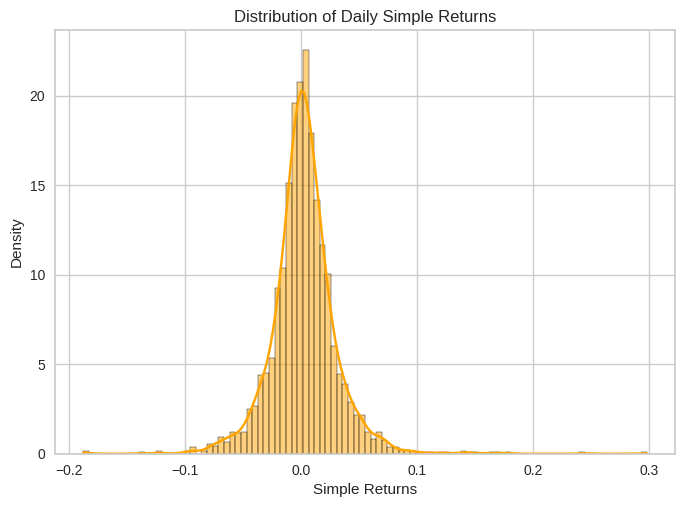

In [76]:
# Histogram and KDE plot
sns.histplot(returns, kde=True, bins=100, color='orange', stat='density')
plt.title('Distribution of Daily Simple Returns')
plt.xlabel('Simple Returns')
plt.ylabel('Density')
plt.show()

Seems normally distributed visually yet important to test

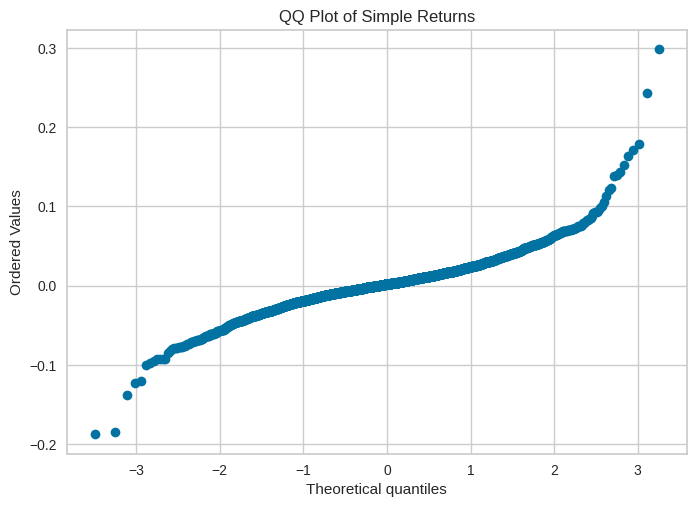

In [77]:
# QQ Plot
plt.figure()
probplot(returns, dist="norm", plot=plt)
plt.title('QQ Plot of Simple Returns')
plt.show()

The Shapiro-Wilk test specifically tests for normality

* Statistic: Measures how well the data fits a normal distribution.
* A low p-value (typically < 0.05) indicates that the data is not normally distributed.
* A high p-value suggests that the data is normally distributed.

In [78]:
# Shapiro-Wilk test
stat, p = shapiro(returns)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test: Statistics=nan, p=1.000


While the simple returns themselves may not be perfectly normal, ARMA and GARCH models can still be applied. The critical aspect is that the residuals from these models should ideally be white noise, meaning they should not exhibit autocorrelation, and their distribution should be close to normal.

## ARMA

In [79]:
# Using auto_arima to find the best ARMA model
auto_model = auto_arima(scaled_returns, seasonal=False, stepwise=True, trace=True,
                           error_action='ignore', suppress_warnings=True,
                           information_criterion='aic')

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=10.89 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14347.808, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=14341.336, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=14341.688, Time=0.68 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=14342.198, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=14342.579, Time=1.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=7.74 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14317.529, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14326.836, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=14319.177, Time=1.85 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14319.221, Time=3.78 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=14317.815, Time=1.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=14321.169, Time=1.92 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 31.843 seconds
                   

In [80]:
# ARMA model on returns
# d= 0 since it is stationary
arma_model = ARIMA(scaled_returns, order=(1, 0, 0))  # ARMA(p, q)
arma_fit = arma_model.fit()
print(arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                 2914
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7155.765
Date:                Thu, 18 Jul 2024   AIC                          14317.529
Time:                        07:20:12   BIC                          14335.461
Sample:                             0   HQIC                         14323.989
                               - 2914                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2514      0.050      4.989      0.000       0.153       0.350
ar.L1         -0.0622      0.013     -4.857      0.000      -0.087      -0.037
sigma2         7.9520      0.088     90.409      0.0

In [81]:
#  residuals from ARMA model
residuals = arma_fit.resid

Inspecting the residuals to ensure they resemble white noise

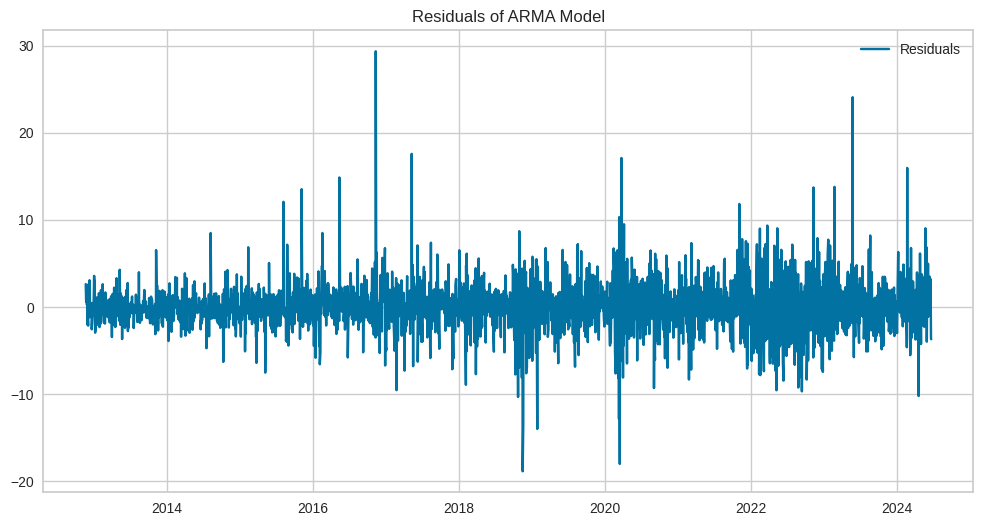

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARMA Model')
plt.legend()
plt.show()

The residuals plot shows that the residuals from the ARMA model have fluctuations over time, with some periods exhibiting higher volatility than others. This suggests that the volatility is not constant, which is characteristic of financial time series data and justifies the use of a GARCH model to capture this time-varying volatility.

**What are the effects of ARIMA model on residuals?**

If the residuals show no significant autocorrelation (i.e., all points are within the confidence interval), the ARMA model has adequately captured the autocorrelation in the returns series.

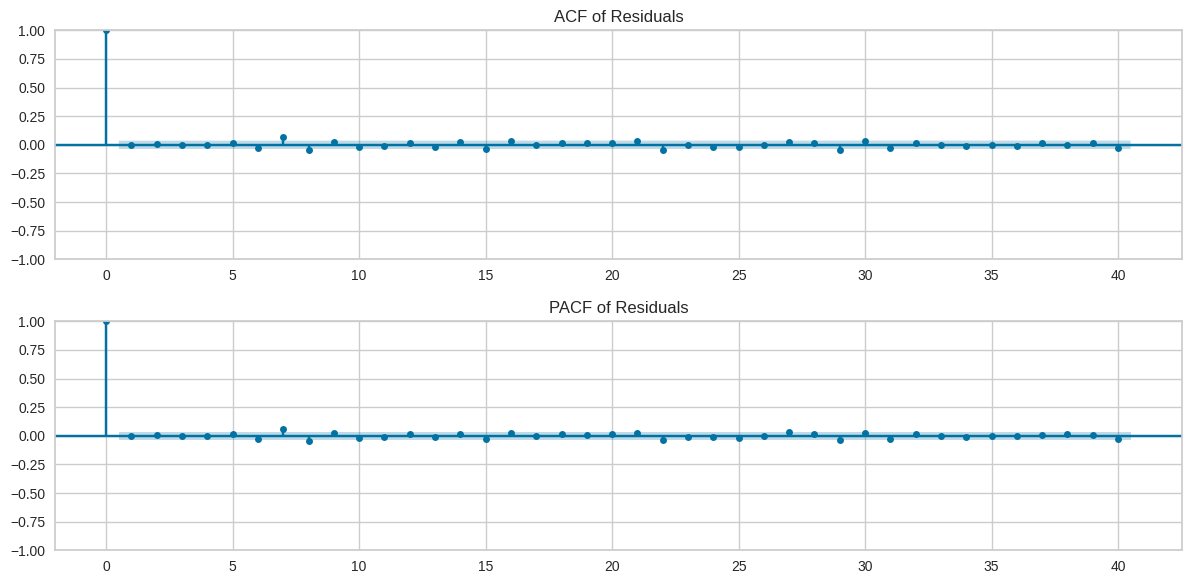

In [83]:
# Ploting ACF and PACF of residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.subplot(212)
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')
plt.tight_layout()
plt.show()


ACF Plot: The autocorrelations of the residuals are close to zero and within the confidence intervals at all lags.

PACF Plot: The partial autocorrelations of the residuals are also close to zero and within the confidence intervals at all lags.

Since the residuals do not exhibit significant autocorrelation (all points are within the confidence intervals), the ARMA model has adequately captured the autocorrelation in the returns series. This indicates that the residuals are approximately white noise.

## GARCH Model on ARMA Residuals

Objective: To first remove any autocorrelation structure in the returns series using an ARIMA model and then model the volatility of the residuals.

> In financial time series analysis, GARCH models are generally preferred over ARCH models due to their ability to better capture the complexities and persistence in volatility patterns. For our analysis, using a GARCH model provides a more robust and comprehensive approach to modeling the volatility of stock returns.

Why Use GARCH for Financial Data?

Volatility Clustering: Financial time series data, such as stock returns, often exhibit periods of high volatility followed by periods of low volatility. This phenomenon, known as volatility clustering, cannot be captured effectively by standard ARIMA models.

Leverage Effect: The impact of new information on volatility can be asymmetric. Negative news tends to increase volatility more than positive news. GARCH models can be extended to capture such asymmetries.

Conditional Heteroskedasticity: While ARIMA models assume constant variance (homoscedasticity), GARCH models allow for time-varying volatility (heteroscedasticity), which is more realistic for financial data.

References :

1. [GARCH tutorial](https://fastercapital.com/content/GARCH-Modeling-in-Python--Building-Volatility-Forecasts.html)
2. [Using the GARCH model to analyze and predict the different stock markets](https://www.diva-portal.org/smash/get/diva2:576215/FULLTEXT02.pdf)
3. [Research on Stock Price](https://www.e3s-conferences.org/articles/e3sconf/pdf/2021/68/e3sconf_netid21_02030.pdf)
4. [Forecasting the Stock Market Using ARIMA and ARCH/GARCH Approaches](https://run.unl.pt/bitstream/10362/109749/1/TEGI0499.pdf)
5. [Volatility Estimation of Stock Prices using Garch Method](https://core.ac.uk/download/pdf/234626643.pdf)
6. [Forecasting volatility using GARCH models](https://core.ac.uk/download/pdf/132797589.pdf)

GARCH on ARIMA Residuals: The model describes how the past shocks (residuals from ARIMA) influence current volatility, which is often a cleaner representation of the volatility process.

Fitting a GARCH model to the residuals will model the volatility of the returns, providing insights into the volatility dynamics of the stock prices.




In [84]:
# Fiting a GARCH(1,1) model to the residuals
# Fiting GARCH model to ARMA residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()
print(garch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15346.510258697617
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1898131.3281973456
Iteration:      3,   Func. Count:     21,   Neg. LLF: 7146.890572682129
Iteration:      4,   Func. Count:     29,   Neg. LLF: 6977.2122227281325
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7154.395869325213
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6972.9804351068915
Iteration:      7,   Func. Count:     47,   Neg. LLF: 6955.466104645933
Iteration:      8,   Func. Count:     52,   Neg. LLF: 6955.437768889193
Iteration:      9,   Func. Count:     57,   Neg. LLF: 6955.437015623772
Iteration:     10,   Func. Count:     62,   Neg. LLF: 6955.436958104075
Iteration:     11,   Func. Count:     67,   Neg. LLF: 6955.436954091489
Iteration:     12,   Func. Count:     71,   Neg. LLF: 6955.436954091243
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6955.436954091489
            Iterations: 

The fitted GARCH(1, 1) model shows that volatility is highly persistent in the returns of NVIDIA's stock prices.

The GARCH model adequately captures the volatility dynamics in the residuals of the ARMA model, as indicated by the significant coefficients.

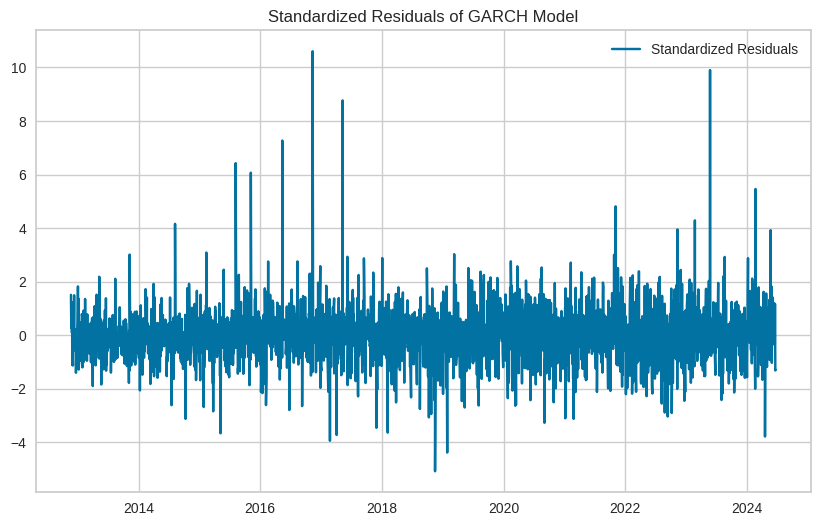

In [85]:
# Plotng standardized residuals
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.std_resid, label='Standardized Residuals')
plt.title('Standardized Residuals of GARCH Model')
plt.legend()
plt.show()

The plot of the standardized residuals from the GARCH model shows that the residuals are now mostly centered around zero with reduced volatility compared to the original residuals from the ARMA model. However, there are still some spikes, which are typical in financial time series data.

Conditional volatility refers to the variability of returns that is dependent on past information. In other words, it is the estimate of the volatility of a financial asset, given the information up to a certain point in time.

GARCH models are designed to model this conditional volatility. They assume that today's volatility can be predicted based on past volatility and past returns. The "conditional" part indicates that the current estimate of volatility depends on the past data.

When we calculate conditional volatility using simple returns, we are looking at the variability of these percentage changes over time. This measure is directly influenced by the magnitude of price changes in absolute terms.

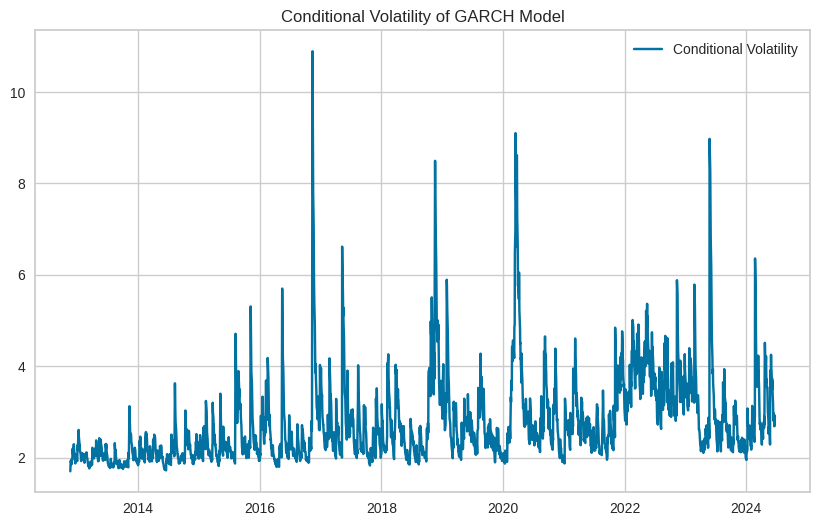

In [86]:
# Plotng conditional variance
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility, label='Conditional Volatility')
plt.title('Conditional Volatility of GARCH Model')
plt.legend()
plt.show()

The plot of the conditional volatility from the GARCH model shows how the estimated volatility changes over time. This plot indicates that the volatility of the residuals varies significantly, with periods of high volatility and periods of low volatility

On the Residuals we will perform Ljung Box test to validate that the residuals from the GARCH model are free from autocorrelation.

To ensure the GARCH model is well-fitted, we should perform additional diagnostics:

Ljung-Box Test on Standardized Residuals: Check for remaining autocorrelation.

Ljung-Box Test on Squared Standardized Residuals: Check for remaining ARCH effects.

In [87]:
# Ljung-Box Test on standardized residuals
ljung_box_resid = acorr_ljungbox(garch_fit.std_resid, lags=[10], return_df=True)
print('Ljung-Box Test on Standardized Residuals:')
print(ljung_box_resid)

Ljung-Box Test on Standardized Residuals:
     lb_stat  lb_pvalue
10  8.889456   0.542626


The p-value of 0.530612 is well above the common significance level of 0.05, indicating that there is no significant autocorrelation remaining in the standardized residuals. This suggests that the GARCH model has adequately captured the autocorrelation structure.

**We have performed ARMA and GARCH modeling on simple returns, following standard procedures such as stationarity testing, ACF and PACF analysis, and residual diagnostics. While simple returns are straightforward to interpret and directly represent percentage changes in price, it is important to note that their distribution exhibited significant deviations from normality, particularly in the tails. Despite these deviations, ARMA and GARCH models can still be effectively applied to simple returns. The key lies in ensuring that the residuals of these models are analyzed for autocorrelation and heteroskedasticity, using tests like the Ljung-Box test to confirm that the residuals behave like white noise. This approach ensures that, even if the initial return series is not perfectly normal, the model residuals meet the assumptions required for accurate forecasting and volatility estimation.**

In [88]:
# Ljung-Box Test on squared standardized residuals
ljung_box_squared_resid = acorr_ljungbox(garch_fit.std_resid ** 2, lags=[10], return_df=True)
print('Ljung-Box Test on Squared Standardized Residuals:')
print(ljung_box_squared_resid)

Ljung-Box Test on Squared Standardized Residuals:
     lb_stat  lb_pvalue
10  3.305308   0.973299


The p-value of 0.973204 is also well above 0.05, indicating that there are no significant ARCH effects remaining in the squared standardized residuals. This suggests that the GARCH model has adequately captured the volatility clustering in the data.

Performing ARMA and GARCH on simple returns is justified if the residuals from these models pass diagnostic checks, including normality tests. Even if the returns themselves deviate from normality, the primary focus is on ensuring that the model residuals are well-behaved, as confirmed by the Ljung-Box test and other diagnostics.

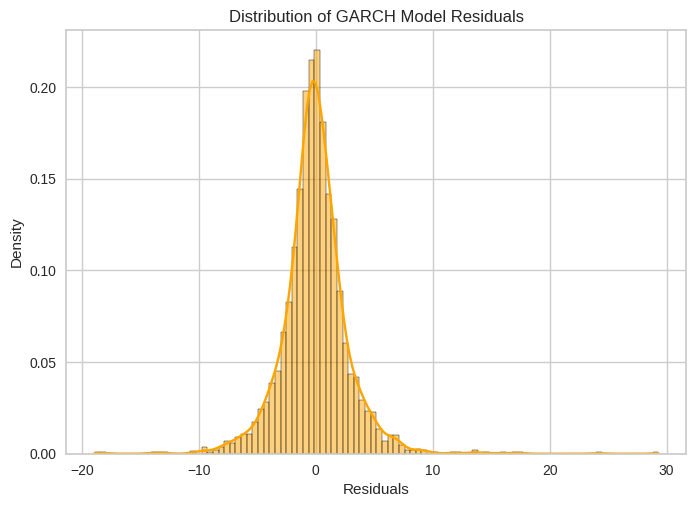

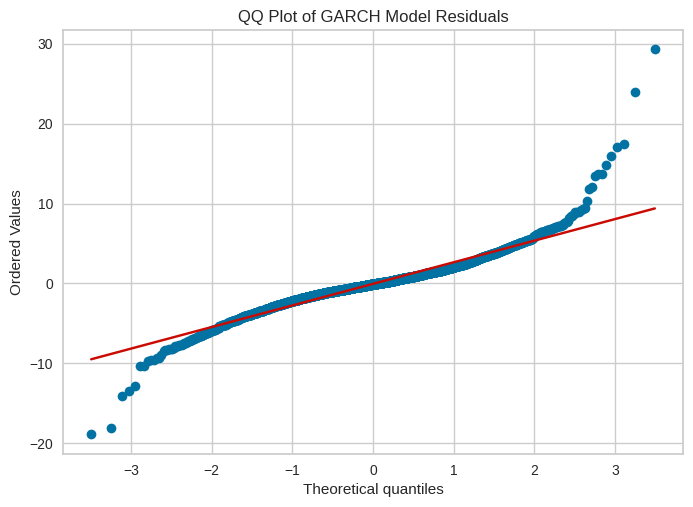

Shapiro-Wilk Test: Statistics=0.9184691905975342, p-value=4.596655810710497e-37


In [89]:
residuals = garch_fit.resid

# Plotting histogram and KDE of residuals
sns.histplot(residuals, kde=True, bins=100, color='orange', stat='density')
plt.title('Distribution of GARCH Model Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# QQ Plot of residuals
plt.figure()
probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of GARCH Model Residuals')
plt.show()

# Shapiro-Wilk Test
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistics={shapiro_test[0]}, p-value={shapiro_test[1]}')

The forecasts from ARMA and GARCH on simple returns can still provide valuable insights, especially if the primary objective is to understand volatility patterns and capture the time-varying nature of risk.

We will proceed to forecast to perform a compartative anlalysis. This allows us to compare the performance of models based on simple returns with those based on log returns.

But in the further steps we will perform ARMA and GARCH modeling on log returns to potentially achieve better accuracy and reliability. This will  be our primary forecast for decision-making and analysis.



In [90]:
# Forecasting future volatility
forecast_horizon = 100  # number of days to forecast
forecasts = garch_fit.forecast(horizon=forecast_horizon)

# Extracting forecasted variances and compute forecasted volatilities
forecasted_variances = forecasts.variance[-1:]
forecasted_volatilities = np.sqrt(forecasted_variances)

garch_residuals = garch_fit.resid / garch_fit.conditional_volatility

In [91]:
print(forecasted_volatilities)

               h.001     h.002     h.003     h.004     h.005     h.006  \
Date                                                                     
2024-06-21  3.053964  3.058086  3.061994  3.065699  3.069212  3.072542   

             h.007     h.008     h.009     h.010  ...     h.091     h.092  \
Date                                              ...                       
2024-06-21  3.0757  3.078695  3.081534  3.084227  ...  3.133385  3.133422   

               h.093    h.094     h.095     h.096    h.097     h.098  \
Date                                                                   
2024-06-21  3.133457  3.13349  3.133521  3.133551  3.13358  3.133607   

               h.099     h.100  
Date                            
2024-06-21  3.133632  3.133657  

[1 rows x 100 columns]


Forecasting the conditional Volatality

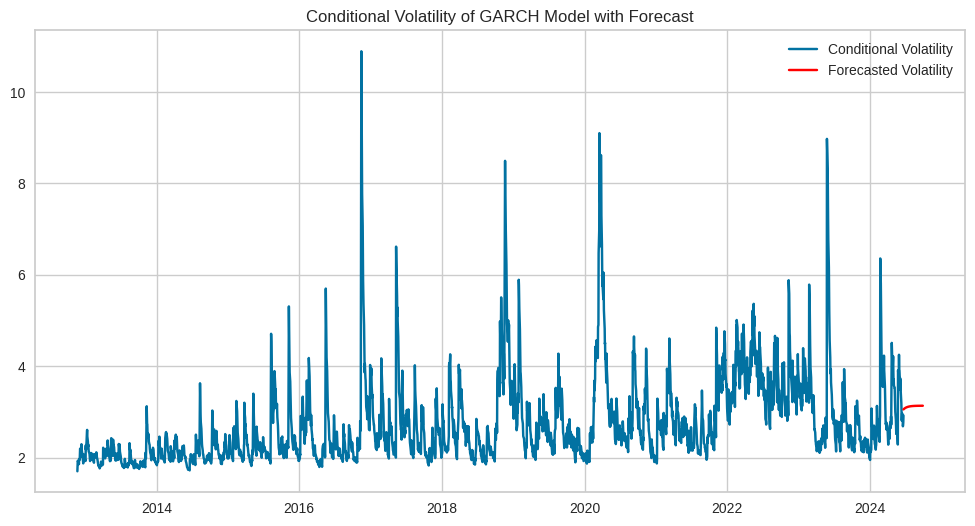

In [92]:
last_date = residuals.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_horizon)

# Creating a DataFrame for forecasted volatilities
forecast_vol_df = pd.DataFrame(forecasted_volatilities.values.flatten(), index=forecast_dates, columns=['Forecasted Volatility'])

plt.figure(figsize=(12, 6))
plt.plot(garch_fit.conditional_volatility, label='Conditional Volatility')
plt.plot(forecast_vol_df, label='Forecasted Volatility', color='red')
plt.title('Conditional Volatility of GARCH Model with Forecast')
plt.legend()
plt.show()


Historical Volatility: The blue line represents the historical conditional volatility of NVIDIA's stock returns, capturing periods of high and low volatility.

Forecasted Volatility: The red line represents the forecasted volatility for the next 30 days, indicating an expected continuation of the current volatility trend.

## Change Point

Performing change point analysis on ARIMA and GARCH residuals, especially standardized residuals, helps to identify significant shifts in volatility and model performance over time.

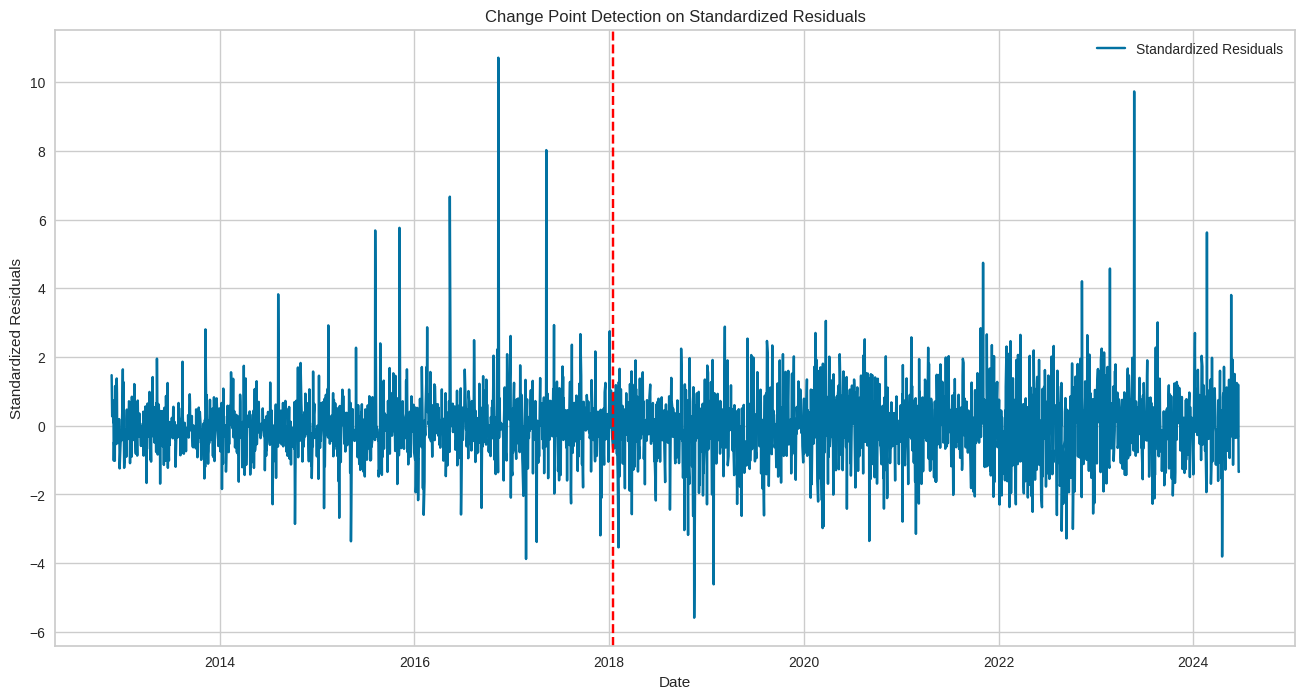

In [93]:
# function to perform change point analysis on ARIMA and GARCH residuals
def change_point_analysis_on_residuals(series, model_order=(1, 0, 1), garch_order=(1, 1), pen=10):
    # Fit ARIMA model to get residuals
    arima_model = ARIMA(series.dropna(), order=model_order)
    arima_fit = arima_model.fit()
    arima_residuals = arima_fit.resid

    garch_model = arch_model(arima_residuals, vol='Garch', p=garch_order[0], q=garch_order[1])
    garch_fit = garch_model.fit(disp="off")
    standardized_residuals = garch_fit.resid / garch_fit.conditional_volatility

    algo = rpt.Pelt(model="rbf").fit(standardized_residuals.dropna().values)
    result = algo.predict(pen=pen)

    # Plot results
    plt.figure(figsize=(16, 8))
    plt.plot(standardized_residuals, label='Standardized Residuals')
    for cp in result:
        if cp < len(standardized_residuals):  # Ensure the index is within bounds
            plt.axvline(standardized_residuals.index[cp], color='red', linestyle='--')
    plt.title('Change Point Detection on Standardized Residuals')
    plt.xlabel('Date')
    plt.ylabel('Standardized Residuals')
    plt.legend()
    plt.show()

change_point_analysis_on_residuals(returns)# Multiplied by 100 for scalign


The change point analysis on the standardized residuals of the ARIMA-GARCH model reveals a significant structural shift around early 2018. This indicates a change in the volatility or pattern of the Nvidia stock returns.

# Log Returns

> Log Returns (or continuously compounded returns) provide a measure of the percentage change in the price of an asset that accounts for compounding. Log returns are often preferred in financial analysis because they are time additive. This means that the log return over a multi-period is simply the sum of the log returns for each period.

## Calculating Log-Returns

In [94]:
adj_close=nvidia_data['Adj Close']

nvidia_data['log_returns']  = np.log(adj_close / adj_close.shift(1))
log_returns  = nvidia_data['log_returns'].dropna()

In [95]:
nvidia_data

Adj Close  log_Close  log_diff_Close   Returns  log_returns
Date                                                                    
2012-11-20    0.265173  -1.327373             NaN       NaN          NaN
2012-11-21    0.272789  -1.299057        0.028316  0.028721     0.028316
2012-11-23    0.274636  -1.292309        0.006748  0.006771     0.006748
2012-11-26    0.279482  -1.274817        0.017491  0.017645     0.017491
2012-11-27    0.280636  -1.270697        0.004121  0.004129     0.004121
...                ...        ...             ...       ...          ...
2024-06-14  131.880005   4.881892        0.017363  0.017514     0.017363
2024-06-17  130.979996   4.875045       -0.006848 -0.006824    -0.006848
2024-06-18  135.580002   4.909562        0.034517  0.035120     0.034517
2024-06-20  130.779999   4.873517       -0.036045 -0.035403    -0.036045
2024-06-21  126.570000   4.840796       -0.032721 -0.032191    -0.032721

[2915 rows x 5 columns]

In [96]:
print(log_returns)

Date
2012-11-21    0.028316
2012-11-23    0.006748
2012-11-26    0.017491
2012-11-27    0.004121
2012-11-28    0.008191
                ...   
2024-06-14    0.017363
2024-06-17   -0.006848
2024-06-18    0.034517
2024-06-20   -0.036045
2024-06-21   -0.032721
Name: log_returns, Length: 2914, dtype: float64


In [97]:
dates = nvidia_data.index

fig = go.Figure()

fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0.3, y1=0,
              line=dict(color="rgba(51, 204, 51, 0.3)"))
fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0, y1=-0.2,
              line=dict(color="rgba(204, 51, 51, 0.3)"))

fig.add_trace(go.Scatter(x=dates[1:], y=log_returns[1:], mode='lines', name=' Daily Log Returns'))

fig.update_layout(
    title="Nvidia Stock Daily Log Returns",
    xaxis_title="Date",
    yaxis_title=" Daily Log Returns",
    font=dict(size=20),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True),
    width=1000,
    height=600
)

fig.show()

The daily log returns of Nvidia stock show that the stock has experienced significant volatility over the years, with periods of both high and low volatility.

In [98]:
print(" ADF Test on Returns:")
adf_test(log_returns)

print("\n KPSS Test on Returns:")
kpss_test(log_returns)

print("\n PP Test on Returns:")
pp_test(log_returns)

 ADF Test on Returns:
ADF Statistic: -19.0951709457048
p-value: 0.0
Critical Value (1%): -3.432602266252907
Critical Value (5%): -2.8625351003877864
Critical Value (10%): -2.5672997201035046

 KPSS Test on Returns:
KPSS Statistic: 0.14404199333258544
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739

 PP Test on Returns:
     Phillips-Perron Test (Z-tau)    
Test Statistic                -57.207
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


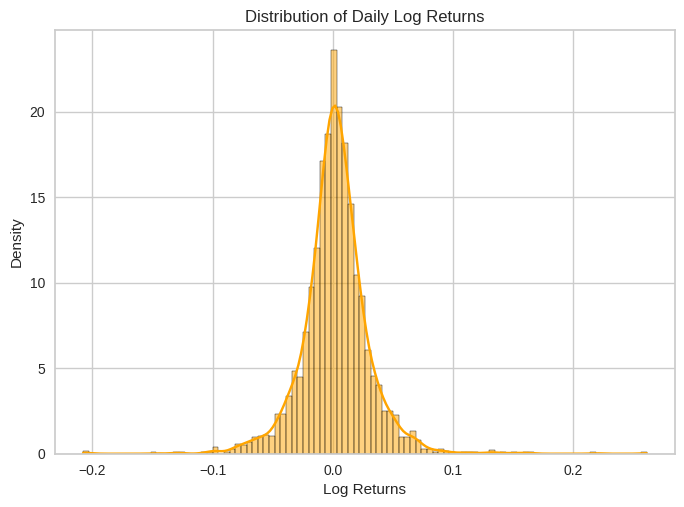

In [99]:
from scipy.stats import norm

# Histogram and KDE plot
sns.histplot(log_returns, kde=True, bins=100, color='orange', stat='density')
plt.title('Distribution of Daily Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Density')
plt.show()

Another[ advantage](https://saturncloud.io/blog/what-are-logarithmic-returns-and-how-to-calculate-them-in-pandas-dataframe/) of using logarithmic returns is that they are normally distributed, which makes them easier to work with mathematically. This is because the natural logarithm of a number is a continuous and smooth function, which means that the resulting distribution of logarithmic returns is also continuous and smooth.

## Normality Tests

Log returns have several desirable properties, they are more normally distributed than simple returns. (As we saw in the Returns section) This makes them preferable for many financial models.

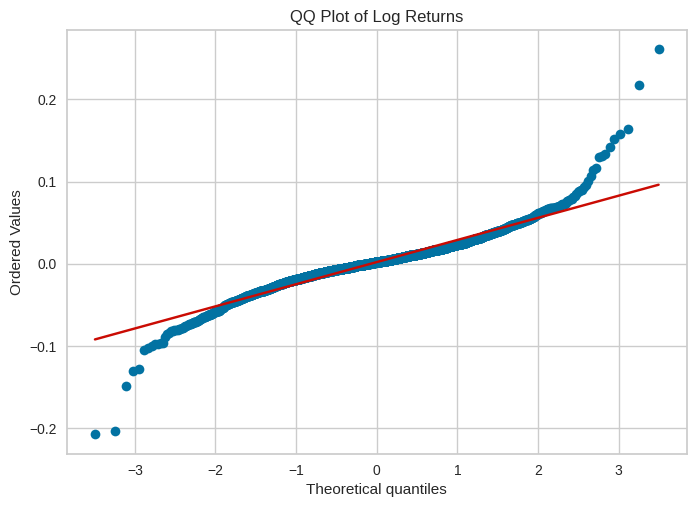

In [100]:
# QQ Plot
plt.figure()
probplot(log_returns, dist="norm", plot=plt)
plt.title('QQ Plot of Log Returns')
plt.show()

Since, we hve visually inspected lets also perform normality tests

In [101]:
# Shapiro-Wilk test
stat, p = shapiro(log_returns)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test: Statistics=0.925, p=0.000


**Given the findings from the simple returns, it is prudent to also perform ARMA and GARCH modeling on log returns, which typically exhibit better normality properties. Log returns handle compounding effects and often provide a more normalized distribution, which can enhance the robustness of the statistical modeling process. By comparing the results of ARMA and GARCH models on log returns, we can leverage the improved normality to potentially achieve more reliable residuals. This, in turn, will be validated through rigorous diagnostic checks, including the Ljung-Box test, to ensure that the residuals are indeed white noise. The improved normality of log returns supports the assumptions underlying ARMA and GARCH models, thereby potentially leading to more accurate and stable forecasts. This dual approach bjective provides us a comprehensive analysis, providing insights that account for different characteristics of the return series.**

## Ljung Box Test

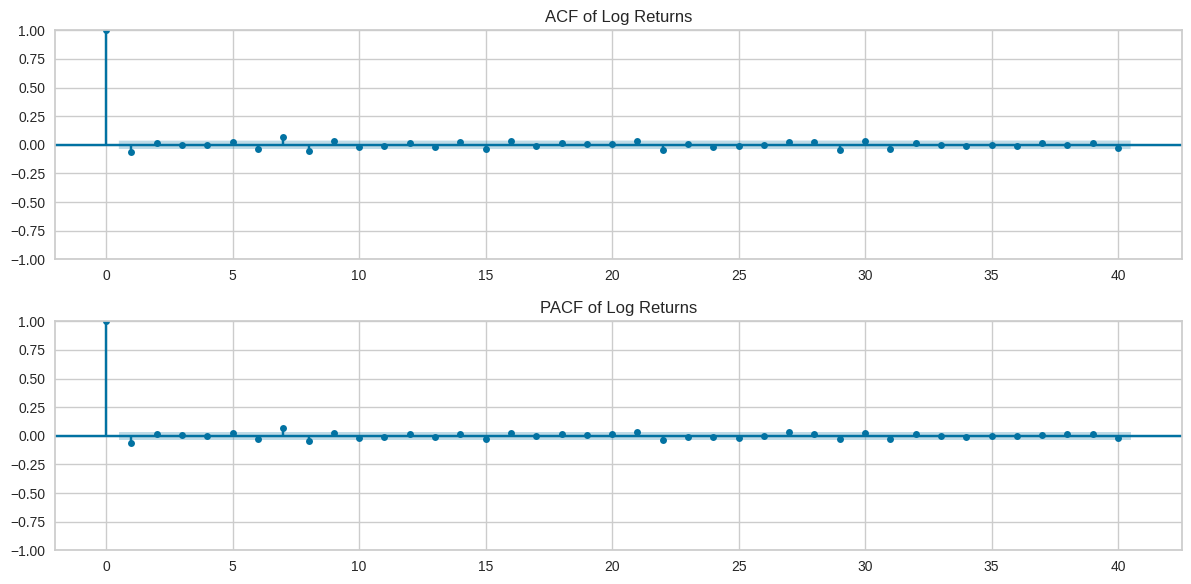

In [102]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(log_returns, lags=40, ax=plt.gca())
plt.title('ACF of Log Returns')
plt.subplot(212)
plot_pacf(log_returns, lags=40, ax=plt.gca())
plt.title('PACF of Log Returns')
plt.tight_layout()
plt.show()

Both ACF and PACF plots show similar characteristics a significant spike at lag 1  then at lag 7 and quickly drop to near zero.


In [103]:
# Ljung-Box Test
ljung_box_results = acorr_ljungbox(log_returns, lags=[10], return_df=True)
print(ljung_box_results)

      lb_stat  lb_pvalue
10  43.531829   0.000004


The Ljung-Box test results indicate significant autocorrelation in the log returns (p-value = 0.000004), which suggests that the log returns are not completely white noise and there are dependencies that can be modeled.

## Auto ARIMA

In [104]:
# Using auto_arima to find the best ARMA model
auto_model = auto_arima(log_returns, seasonal=False, stepwise=True, trace=True,
                           error_action='ignore', suppress_warnings=True,
                           information_criterion='aic')

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-12549.483, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12546.427, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12552.998, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-12552.616, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12552.271, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12551.827, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12550.792, Time=0.52 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-12569.598, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-12561.012, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-12568.218, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-12568.098, Time=0.85 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12569.254, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12566.242, Time=1.30 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 6.234 seco

In [105]:
# Fit the selected ARMA model
arma_model_log = ARIMA(log_returns, order=auto_model.order)
arma_fit_log = arma_model_log.fit()
print(arma_fit_log.summary())

                               SARIMAX Results                                
Dep. Variable:            log_returns   No. Observations:                 2914
Model:                 ARIMA(1, 0, 0)   Log Likelihood                6287.799
Date:                Thu, 18 Jul 2024   AIC                         -12569.598
Time:                        07:24:16   BIC                         -12551.666
Sample:                             0   HQIC                        -12563.139
                               - 2914                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.000      4.298      0.000       0.001       0.003
ar.L1         -0.0602      0.012     -4.934      0.000      -0.084      -0.036
sigma2         0.0008   9.18e-06     85.190      0.0

The AR(1) coefficient is -0.0602 with a p-value of 0.000, indicating it is statistically significant.

The Ljung-Box test on the residuals at lag 1 has a Q-value of 0.00 with a p-value of 0.96, indicating no significant autocorrelation at lag 1.

The test indicates significant heteroskedasticity (H = 3.18).

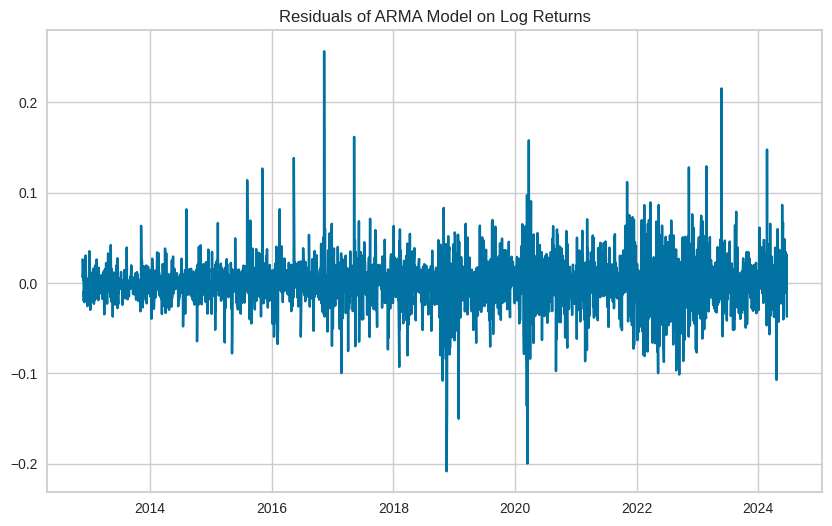

In [106]:
# Plotting the residuals of the ARMA model
arma_residuals_log = arma_fit_log.resid
plt.figure(figsize=(10, 6))
plt.plot(arma_residuals_log)
plt.title('Residuals of ARMA Model on Log Returns')
plt.show()

The residual plot shows the residuals exhibit volatility clustering, with periods of high volatility followed by more high volatility and periods of low volatility followed by low volatility. This indicates that there is still information in the residuals that can be captured by a GARCH model.

## GARCH Model on ARMA Residuals

In [107]:
# Fit GARCH(1,1) model with t-distribution on ARMA residuals
garch_model_log = arch_model(arma_residuals_log, vol='Garch', p=1, q=1, dist='StudentsT')
garch_fit_log = garch_model_log.fit()
print(garch_fit_log.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 54593.11783656289
Iteration:      2,   Func. Count:     23,   Neg. LLF: 53204.098569871145
Iteration:      3,   Func. Count:     38,   Neg. LLF: -6765.46562295583
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6765.465623082949
            Iterations: 7
            Function evaluations: 38
            Gradient evaluations: 3
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                6765.47
Distribution:      Standardized Student's t   AIC:                          -13520.9
Method:                  Maximum Likelihood   BIC:                          -13491.0
                                              No. Observations:  

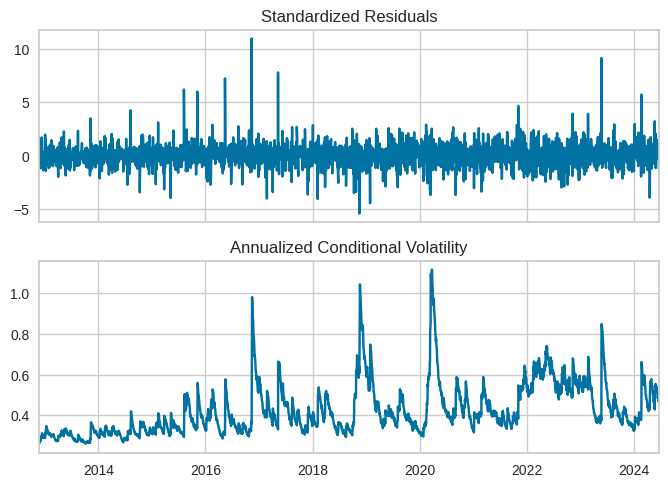

In [108]:
# Plotting the fitted volatility
garch_fit_log.plot(annualize='D')
plt.show()

The plot of standardized residuals shows that the residuals are generally centered around zero but exhibit some extreme values.

Conditional volatility calculated from log returns is often annualized to provide a standardized measure that is easier to interpret and compare. Annualizing involves scaling the volatility by the square root of the number of trading periods in a year (typically 252 for daily data). This scaling gives an estimate of the expected annual volatility, assuming the same level of volatility persists throughout the year.


The plot of annualized conditional volatility indicates periods of higher and lower volatility, consistent with volatility clustering.

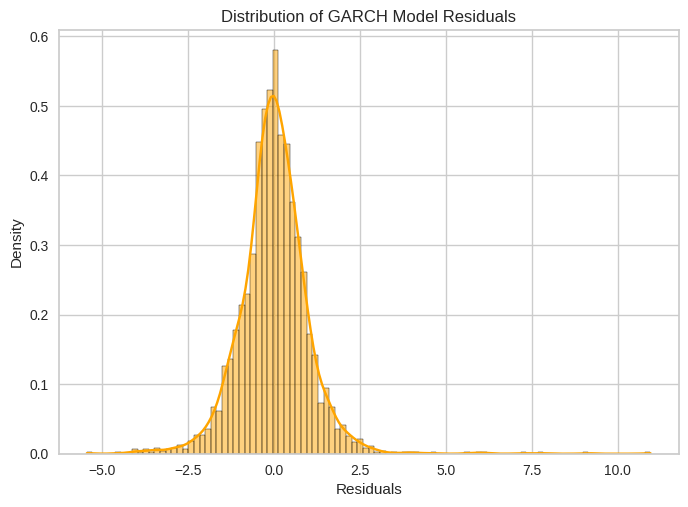

In [109]:
# Extracting standardized residuals
garch_residuals_log = garch_fit_log.resid / garch_fit_log.conditional_volatility

# Plotting histogram and KDE of residuals
sns.histplot(garch_residuals_log, kde=True, bins=100, color='orange', stat='density')
plt.title('Distribution of GARCH Model Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

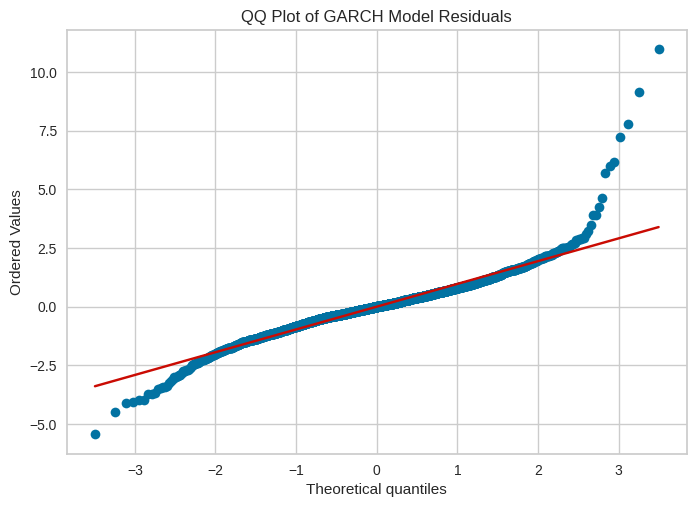

In [110]:
# QQ Plot of residuals
plt.figure()
probplot(garch_residuals_log, dist="norm", plot=plt)
plt.title('QQ Plot of GARCH Model Residuals')
plt.show()

The QQ plot shows deviations from the 45-degree line, particularly in the tails, indicating that the residuals are not perfectly normally distributed and exhibit heavy tails.

While the residuals are not perfectly normally distributed, the diagnostic checks confirm that the model captures the essential characteristics of the data.

In [111]:
shapiro_test = shapiro(garch_residuals_log)
print(f'Shapiro-Wilk Tes on GARCH Residuals Statistics={shapiro_test[0]}, p-value={shapiro_test[1]}')

Shapiro-Wilk Tes on GARCH Residuals Statistics=0.9228199124336243, p-value=2.757659058139996e-36


The null hypothesis of normality is rejected, indicating that the residuals are not normally distributed.

In [112]:
# Ljung-Box Test on GARCH residuals
ljung_box_residuals_log = acorr_ljungbox(garch_residuals_log, lags=[10], return_df=True)
print(ljung_box_residuals_log)

    lb_stat  lb_pvalue
10  9.82424   0.456046


The Ljung-Box test results suggest that the residuals of the GARCH model do not exhibit significant autocorrelation up to lag 10. This indicates that the GARCH model has effectively captured the time-varying volatility in the log returns, and the residuals behave like white noise.

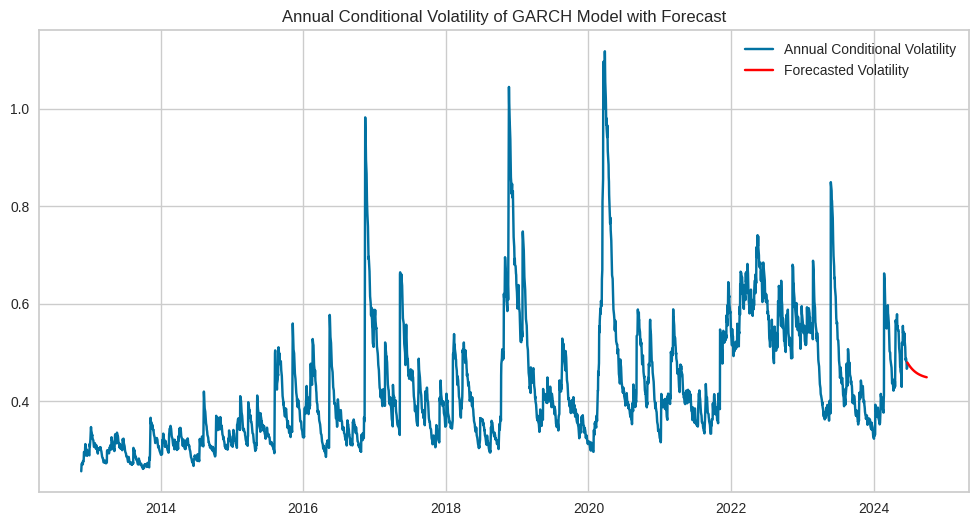

In [113]:
# Forecasting future volatility
forecast_horizon = 100  # number of days to forecast
forecasts = garch_fit_log.forecast(horizon=forecast_horizon)

# Extracting forecasted variances and compute forecasted volatilities
forecasted_variances = forecasts.variance[-forecast_horizon:]
forecasted_volatilities = np.sqrt(forecasted_variances)

# Annualize the forecasted volatilities (assuming 252 trading days per year)
annual_factor = np.sqrt(252)
annual_forecasted_volatilities = forecasted_volatilities * annual_factor

# Extracting historical conditional volatilities and annualize them
historical_volatilities = garch_fit_log.conditional_volatility
annual_historical_volatilities = historical_volatilities * annual_factor

# Generating forecast dates
last_date = annual_historical_volatilities.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_horizon)

# Creating a DataFrame for forecasted volatilities
forecast_vol_df = pd.DataFrame(annual_forecasted_volatilities.values.flatten(), index=forecast_dates, columns=['Forecasted Volatility'])

# Plotting the historical and forecasted volatilities
plt.figure(figsize=(12, 6))
plt.plot(annual_historical_volatilities, label='Annual Conditional Volatility')
plt.plot(forecast_vol_df, label='Forecasted Volatility', color='red')
plt.title('Annual Conditional Volatility of GARCH Model with Forecast')
plt.legend()
plt.show()


## Cumulative returns

> Cumulative returns show the total return of an investment over a period. The calculation for cumulative returns from log returns involves taking the cumulative product of (1 + log returns).

In [114]:
cumulative_returns = (log_returns + 1).cumprod() - 1
print(cumulative_returns)

Date
2012-11-21      0.028316
2012-11-23      0.035255
2012-11-26      0.053363
2012-11-27      0.057704
2012-11-28      0.066367
                 ...    
2024-06-14    157.590312
2024-06-17    156.504310
2024-06-18    161.940930
2024-06-20    156.067663
2024-06-21    150.928252
Name: log_returns, Length: 2914, dtype: float64


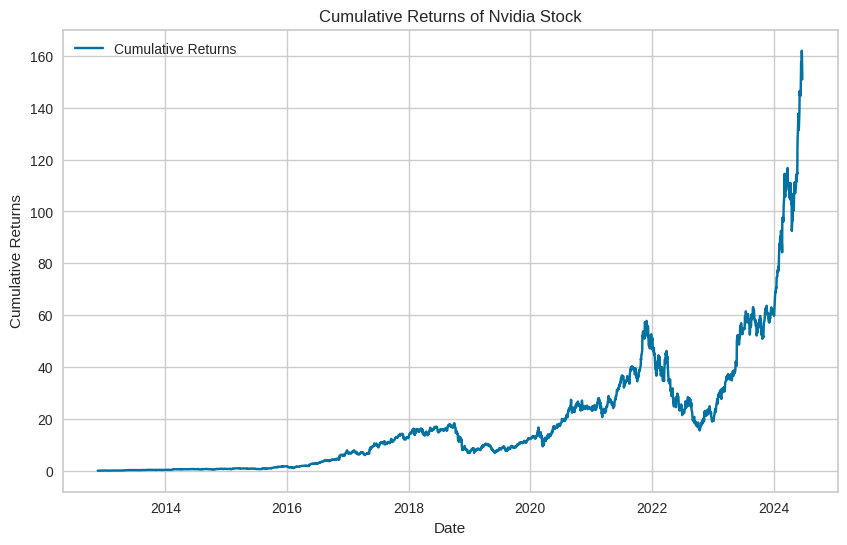

Date
2024-06-14    157.590312
2024-06-17    156.504310
2024-06-18    161.940930
2024-06-20    156.067663
2024-06-21    150.928252
Name: log_returns, dtype: float64


In [115]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Cumulative Returns')
plt.title('Cumulative Returns of Nvidia Stock')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

print(cumulative_returns.tail())

The cumulative returns have shown a significant upward trend, indicating substantial growth in Nvidia's stock price over the period. From 2013 to mid-2024, the investment has grown by over 150 times, as indicated by the cumulative return reaching around 150.

## Daily Average Returns

 [Reference](https://mlforanalytics.com/2019/09/25/financial-analytics-log-returns-using-python/)

> Daily Average Returns represent the average return that an investor could expect to earn each day over a specified period. For log returns, the daily average return is simply the mean of the daily log returns.

In [116]:
mean = log_returns.mean()
daily_log_returns = mean
daily_log_returns

0.0021167358787277006

The calculated daily average log return for Nvidia stock is approximately 0.002117 (or 0.2117%). This means that, on average, Nvidia's stock price increased by about 0.2117% per day over the period analyzed.

## Volatality

> Volatility is a statistical measure of the dispersion of returns for a given security or market index. In the context of stock returns, it quantifies the degree of variation in the returns over a specific period. Higher volatility indicates a higher level of risk, as the stock's price can change dramatically over a short time period in either direction.

In [117]:
vol=np.std(log_returns)
vol

0.0280178999142278

The calculated daily volatility for Nvidia stock is approximately 0.028018. This value indicates that the log returns of Nvidia stock have a standard deviation of about 2.8018% per day.

In [118]:
print(f'The seasonal average return of NVIDIA is: {mean} \n The seasonal volatility of NVIDIA is: {vol}')

The seasonal average return of NVIDIA is: 0.0021167358787277006 
 The seasonal volatility of NVIDIA is: 0.0280178999142278


[These values don’t tell much about right? ](https://medium.com/@palajnc/calculating-the-volatility-and-return-of-stocks-with-python-cb6d90314e5a)that is because they are daily and log-returns, but it is possible to convert it to better easy to understand metrics. The standard is to measure the assets in CAGR (Change Annual Grow Ratio)

## Annual Average and Volatality

Annualizing daily log returns and volatility provides a better understanding of the expected performance and risk of an investment over a year.

> The annual average return is calculated by multiplying the mean of daily log returns by the number of trading days in a year (typically 252 previously we considered in decomposition period). The annual volatility is calculated by multiplying the daily volatility by the square root of the number of trading days in a year.

In [119]:
mean_annual_log=252*mean
vol_annual_log=vol * np.sqrt(252)
print(f"Annual Average: {mean_annual_log} \n Volatality: {vol_annual_log}" )

Annual Average: 0.5334174414393805 
 Volatality: 0.4447703725880681


Annual Average Log Return which indicates the average yearly return expected based on daily log returns, the valuefor  our Nvidia stock is approximately 53.34%, suggesting significant growth over the period analyzed. Then, coming to annualized volatility that epresents the annual risk or variability in returns the value is approximately 44.48%, indicating a relatively high level of risk.

## CAGR

> Change Annual grow Ratio or Annualized return provides the average annual return of an investment over a period.

In [120]:
mean_annual_effective=np.exp(mean_annual_log)-1
vol_annual_effective=np.exp(vol_annual_log)-1

print(f'The anuual effective return of NVIDIA is: {mean_annual_effective*100}%, \n The annual effective volatility of NVIDIA is: {vol_annual_effective*100}%')

The anuual effective return of NVIDIA is: 70.47482424390385%, 
 The annual effective volatility of NVIDIA is: 56.013190564585116%


The annual effective return is approximately 70.47%. This means that, on average, Nvidia's stock would need to grow by about 70.47% per year to achieve the same growth as observed in the log returns.

The annual effective volatility is approximately 56.01%. This indicates the variability or risk associated with Nvidia's stock on an annual basis.

## VaR

> Value at Risk measures the potential loss in value of an asset with a given probability over a specific time period.

In [121]:
import scipy.stats as stats

# Calculating VaR at 95% confidence level
confidence_level = 0.95
VaR = np.percentile(log_returns, (1 - confidence_level) * 100)

print(f'Value at Risk (VaR): {VaR:.4f}')

Value at Risk (VaR): -0.0413


The calculated VaR for Nvidia's daily log returns at a 95% confidence level is approximately -0.0413. This indicates that there is a 5% chance that the daily log return will be worse than -4.13%. In other words, on 5 out of 100 trading days, you can expect the daily loss to exceed 4.13%.

## Confidence Intervals

Code reference : [Juan Camilo Palacio](https://medium.com/@palajnc/calculating-the-volatility-and-return-of-stocks-with-python-cb6d90314e5a)

Upper Confidence Interval: This line provides an estimate of the upper bound of the stock price, considering both the average growth rate and the daily volatility.

Lower Confidence Interval: This line provides an estimate of the lower bound of the stock price, considering the same factors.

Text(0.5, 1.0, 'NVIDIA price with confidence intervals')

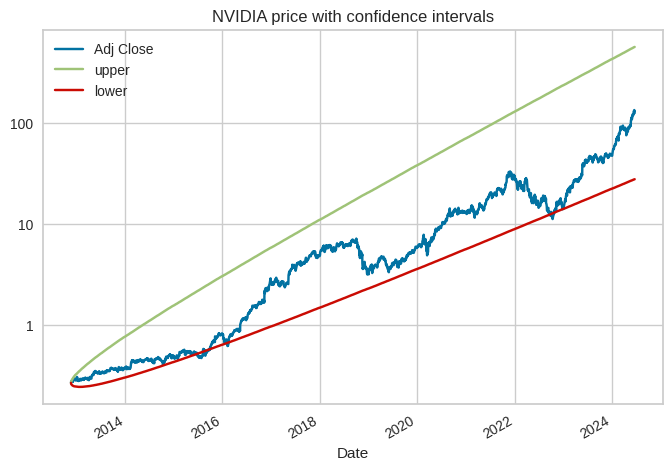

In [122]:
from matplotlib.ticker import ScalarFormatter

mean_daily_effective=np.exp(mean)-1
vol_daily_effective=np.exp(vol)-1
first_price=nvidia_data['Adj Close'][0]

nvidia_data['upper']=first_price*np.array([((1+mean_daily_effective)**i) *
                           ((1+vol_daily_effective)**np.sqrt(i)) for i in range(len(nvidia_data))])

nvidia_data['lower']=first_price*np.array([((1+mean_daily_effective)**i) /
                           ((1+vol_daily_effective)**np.sqrt(i)) for i in range(len(nvidia_data))])

nvidia_data.plot(y=['Adj Close','upper','lower'])
plt.yscale('log')

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.title('NVIDIA price with confidence intervals')

From this plot we can see the upper bound and lower bound that indicate the range within which the future prices are expected to lie, considering historical mean returns and volatility.

# TSForecastingExperiment

This module provides an experimental setup for conducting various time series forecasting tasks with minimal coding.

In [123]:
from pycaret.time_series import TSForecastingExperiment

The NVIDIDA stock data we have considered contains the values for trading days only that is the frequency 'B'.

> PyCaret doesn't support modeling for daily data with missing values, it is suggested to generate a synthetic sequence of new date column starting from the first start date. [Pycaret Working Example](https://developers.lseg.com/en/article-catalog/article/modelling-and-evaluation-using-pycaret-on-time-series-data)

In [124]:
nvidia_data_exp = data

print(nvidia_data_exp.index)  # This should print the DateTime index

RangeIndex(start=0, stop=2915, step=1)


In [125]:
nvidia_data_exp = nvidia_data_exp[['Date','Adj Close']]

In [126]:
nvidia_data_exp

Date   Adj Close
0     2012-11-20    0.265173
1     2012-11-21    0.272789
2     2012-11-23    0.274636
3     2012-11-26    0.279482
4     2012-11-27    0.280636
...          ...         ...
2910  2024-06-14  131.880005
2911  2024-06-17  130.979996
2912  2024-06-18  135.580002
2913  2024-06-20  130.779999
2914  2024-06-21  126.570000

[2915 rows x 2 columns]

## Preprocessing

In [127]:
from datetime import date, timedelta

sdate = [int(i) for i in nvidia_data_exp.Date.min().split("-")] # start date

sdate = date(sdate[0], sdate[1], sdate[2])

edate = [int(i) for i in nvidia_data_exp.Date.max().split("-")] # end date

edate = date(edate[0], edate[1], edate[2])

In [128]:
nvidia_data_exp['Index_Date'] = pd.date_range(sdate,edate-timedelta(days=1),freq='d')[:nvidia_data_exp.shape[0]]

nvidia_data_exp.index = pd.PeriodIndex(nvidia_data_exp.Index_Date, freq='D')

nvidia_data_exp = nvidia_data_exp.drop("Index_Date", axis=1)

nvidia_data_exp['Adj Close'] = nvidia_data_exp['Adj Close'].astype(float)

nvidia_data_exp.sort_index(ascending=True, inplace=True)

Code Reference for setting the date sequential [Modelling and Evaluation usin PyCaret](https://developers.lseg.com/en/article-catalog/article/modelling-and-evaluation-using-pycaret-on-time-series-data)

In [129]:
nvidia_data_exp.head()

Date  Adj Close
Index_Date                       
2012-11-20  2012-11-20   0.265173
2012-11-21  2012-11-21   0.272789
2012-11-22  2012-11-23   0.274636
2012-11-23  2012-11-26   0.279482
2012-11-24  2012-11-27   0.280636

In [130]:
from pycaret.time_series import TSForecastingExperiment #make sure pycaret is installed

TSForecastingExperiment() initializes the forecasting experiment and with the following simple setup on the Adj Close price data we can utilize the features of TSForecastingExperiment to gain insights on our data. [Tutorial on TSForecastingExperiment](https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Time%20Series%20Forecasting.ipynb)

## On Original Series

***What are the key properties and characteristics of the time series?***

In [131]:
forecast_horizon = 30 # For forecasts
# Setup experiment on original data
exp = TSForecastingExperiment()
exp.setup(data=nvidia_data_exp['Adj Close'], session_id=171, fh=forecast_horizon) #session Id a random value so used matricola

Time series specific Cross Validation and Fold generator:

Expanding Window Splitter: The training set grows with each iteration, including all data up to a certain point.

Sliding Window Splitter: Both the training and validation sets slide forward through time, maintaining a fixed window size.

Rolling Forecast Origin: Similar to the expanding window but used for multiple steps ahead forecasting.

In [132]:
# Ploting diagnostics
exp.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [133]:
#ACF, and PACF for the original data
exp.plot_model(plot="acf")
exp.plot_model(plot="pacf", data_kwargs={'nlags':30}, fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'})

In [134]:
exp.check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting          Value  
0                                    2915.0  
1                                       0.0  
2                                 12.184745  
3                                  4.698981  
4                                 19.338275  
5                                 373.96889  
6                                  10.32273  
7                                   2.95705  
8                                    2767.0  
9   {'alpha': 0.05, 'K': 24}    59214.83499  
10  {'alpha': 0.05, 'K': 48}  105236.912091  
11  {'alpha': 0.05, 'K': 24}            0.0  
12  {'alpha': 0.05, 'K': 48}            0.0  
13  {'alpha': 0.05, 'K': 24}            0.0  
14  {'alpha': 0.05, 'K': 48}            0.0  
15           {'alpha': 0.05}          False  
16           {'alpha': 0.05}            1.0  
17           {'alpha': 0.05}       5.872963  
18           {'alpha': 0.05}      -3.432617  
19           {'alpha': 0.05}      -2.862542  
20           {'alpha': 0.05}      -2.567303  
21           {'alpha': 0.05}          False  
22           {'alpha': 0.05}           0.01  
23           {'alpha': 0.05}       1.099928  
24           {'alpha': 0.05}          0.119  
25           {'alpha': 0.05}          0.146  
26           {'alpha': 0.05}          0.176  
27           {'alpha': 0.05}          0.216  
28           {'alpha': 0.05}          False  
29           {'alpha': 0.05}            0.0

Using the check_stats function various stat tests can be performed on the train variable i.e Adj Close. Here it clearly shows that the stationarity is false and backs up with the ADF and KPSS statistic and p values which are similar to the ones we obtained by directly performing the stationarity tests on the original data.

ADF Test on Original Series:
ADF Statistic: 5.872962520786018
p-value: 1.0
Critical Value (1%): -3.432617102137327
Critical Value (5%): -2.8625416527115592
Critical Value (10%): -2.567303208514837

 According to the above stats, the time series data of ADj Close price exhibits significant seasonality, is non-stationary, and does not follow a normal distribution. The presence of high kurtosis and skewness further supports the need for transformation or advanced modeling techniques to achieve better forecasts. Which we delt with in the Transformation section of the notebook.

## On Transformed Data

Let's try setting up the TSForecastig Expriment on transformed data to see how the diagnostics and stats change and whether they align with our previous code interpretations.

In [135]:
# Log Transformation
nvidia_data_exp['log_Close'] = np.log(nvidia_data_exp['Adj Close'])

# Log Differencing
nvidia_data_exp['log_diff_Close'] = nvidia_data_exp['log_Close'].diff().dropna()

nvidia_data_exp['log_diff_Close'].replace([np.inf, -np.inf], np.nan, inplace=True)
nvidia_data_exp['log_diff_Close'].dropna(inplace=True)

In [136]:
forecast_horizon = 30
# Setup experiment on transformed data
exp_diff = TSForecastingExperiment()
exp_diff.setup(data=nvidia_data_exp['log_diff_Close'].dropna(), session_id=171, fh=forecast_horizon)

Recommended 'd' value is now zero as already differenced series. Sesonalities have also been reduced.

In [137]:
# Plot diagnostics, ACF, and PACF for the transformed data
exp_diff.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [138]:
exp_diff.plot_model(plot="acf")
exp_diff.plot_model(plot="pacf", data_kwargs={'nlags':30}, fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'})

In [139]:
exp_diff.check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting       Value  
0                                 2914.0  
1                                    0.0  
2                               0.002117  
3                               0.002105  
4                               0.028023  
5                               0.000785  
6                               8.428835  
7                               0.266275  
8                                 2897.0  
9   {'alpha': 0.05, 'K': 24}   68.688204  
10  {'alpha': 0.05, 'K': 48}  100.013113  
11  {'alpha': 0.05, 'K': 24}    0.000003  
12  {'alpha': 0.05, 'K': 48}    0.000016  
13  {'alpha': 0.05, 'K': 24}         0.0  
14  {'alpha': 0.05, 'K': 48}         0.0  
15           {'alpha': 0.05}        True  
16           {'alpha': 0.05}         0.0  
17           {'alpha': 0.05}  -19.095171  
18           {'alpha': 0.05}   -3.432602  
19           {'alpha': 0.05}   -2.862535  
20           {'alpha': 0.05}     -2.5673  
21           {'alpha': 0.05}        True  
22           {'alpha': 0.05}         0.1  
23           {'alpha': 0.05}    0.091304  
24           {'alpha': 0.05}       0.119  
25           {'alpha': 0.05}       0.146  
26           {'alpha': 0.05}       0.176  
27           {'alpha': 0.05}       0.216  
28           {'alpha': 0.05}       False  
29           {'alpha': 0.05}         0.0

Performing check_stats on transformed data gives us the insights on various stats on the Log-differenced Adj Close Price. From the stationarity test now being false and the ADF and KPSS statistics being lower than critical values it is clearly stated that data has achived stationarity.

## On Returns

Setting up the TSForecastingExperiment to derive stats and diagnostics on Returns data.

In [140]:
# Load your NVIDIA stock data
nvidia_data_ret = nvidia_data_exp

# Verify index and columns
print(nvidia_data_ret.index)

nvidia_data_ret['Returns'] = nvidia_data_ret['Adj Close'].pct_change()

PeriodIndex(['2012-11-20', '2012-11-21', '2012-11-22', '2012-11-23',
             '2012-11-24', '2012-11-25', '2012-11-26', '2012-11-27',
             '2012-11-28', '2012-11-29',
             ...
             '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06',
             '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10',
             '2020-11-11', '2020-11-12'],
            dtype='period[D]', name='Index_Date', length=2915)


As Indexing was handled earlier the freq here is 'D'

In [141]:
print(nvidia_data_ret)

                  Date   Adj Close  log_Close  log_diff_Close   Returns
Index_Date                                                             
2012-11-20  2012-11-20    0.265173  -1.327373             NaN       NaN
2012-11-21  2012-11-21    0.272789  -1.299057        0.028316  0.028721
2012-11-22  2012-11-23    0.274636  -1.292309        0.006748  0.006771
2012-11-23  2012-11-26    0.279482  -1.274817        0.017491  0.017645
2012-11-24  2012-11-27    0.280636  -1.270697        0.004121  0.004129
...                ...         ...        ...             ...       ...
2020-11-08  2024-06-14  131.880005   4.881892        0.017363  0.017514
2020-11-09  2024-06-17  130.979996   4.875045       -0.006848 -0.006824
2020-11-10  2024-06-18  135.580002   4.909562        0.034517  0.035120
2020-11-11  2024-06-20  130.779999   4.873517       -0.036045 -0.035403
2020-11-12  2024-06-21  126.570000   4.840796       -0.032721 -0.032191

[2915 rows x 5 columns]


In [142]:
forecast_horizon = 30 #forecasting 30 days
# Setup experiment on Returns Data
exp_ret = TSForecastingExperiment()
exp_ret.setup(data=nvidia_data_ret['Returns'].dropna(), session_id=171, fh=forecast_horizon)

In [143]:
exp_ret.check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting      Value  
0                                2914.0  
1                                   0.0  
2                              0.002514  
3                              0.002107  
4                              0.028259  
5                              0.000799  
6                             10.197695  
7                              0.719771  
8                                2897.0  
9   {'alpha': 0.05, 'K': 24}  67.945935  
10  {'alpha': 0.05, 'K': 48}  98.802822  
11  {'alpha': 0.05, 'K': 24}   0.000004  
12  {'alpha': 0.05, 'K': 48}   0.000022  
13  {'alpha': 0.05, 'K': 24}        0.0  
14  {'alpha': 0.05, 'K': 48}        0.0  
15           {'alpha': 0.05}       True  
16           {'alpha': 0.05}        0.0  
17           {'alpha': 0.05} -19.122405  
18           {'alpha': 0.05}  -3.432602  
19           {'alpha': 0.05}  -2.862535  
20           {'alpha': 0.05}    -2.5673  
21           {'alpha': 0.05}       True  
22           {'alpha': 0.05}        0.1  
23           {'alpha': 0.05}   0.085352  
24           {'alpha': 0.05}      0.119  
25           {'alpha': 0.05}      0.146  
26           {'alpha': 0.05}      0.176  
27           {'alpha': 0.05}      0.216  
28           {'alpha': 0.05}      False  
29           {'alpha': 0.05}        0.0

In [144]:
# Plot diagnostics
exp_ret.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [145]:
#ACF, and PACF for the original data
exp_ret.plot_model(plot="acf")
exp_ret.plot_model(plot="pacf", data_kwargs={'nlags':30}, fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'})

The rapid decline to near-zero values in both ACF and PACF plots suggests that the returns are stationary. This is typical for return series as they often exhibit mean-reverting properties.

No Significant Lags in ACF plot and  values are within the blue confidence bounds implying that they are not statistically significant. Most of our lags fall within these bounds, suggesting no significant autocorrelation in the returns.

The PACF plot suggests that an AR(1) model might be appropriate since there is a significant spike at lag 1, but no significant lags beyond that.


# Conclusions

To conclude, the comprehensive analysis on the NVIDIA's stock prices
by performing transformation techniques, stationarity tests, ARIMA and GARCH modeling, and change point detection allowed us to gain insights on the stock performance and its chracteristics.


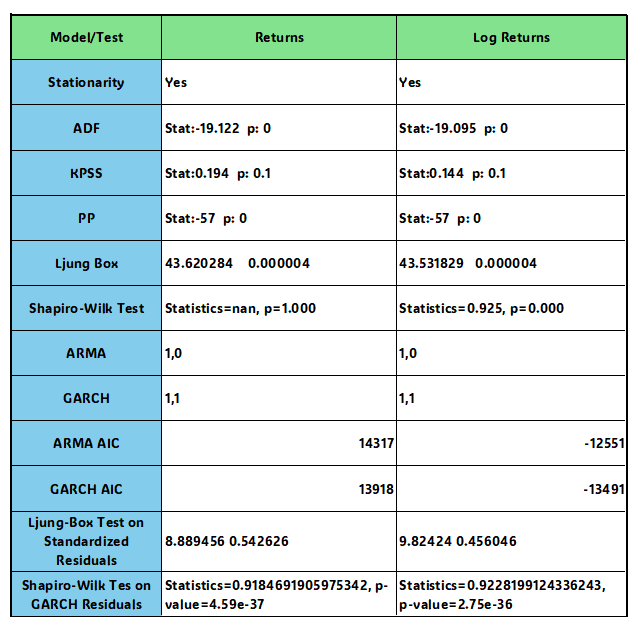

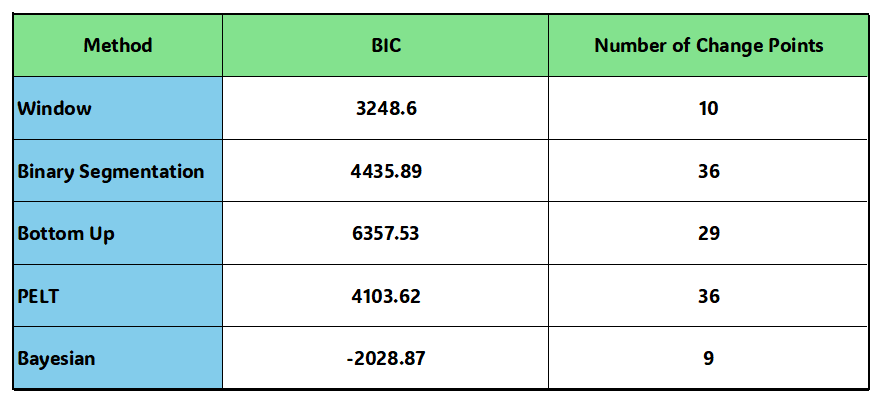

# Future Work: Model comparision

***Which forecasting model performs best on the given time series data?***

Pycaret also allows us to compare different models on time series data. We can either explicitly give a list of models to compare or use the comparemodels() function that runs model trianing on all possible models. [Pycaret Functional API](https://pycaret.gitbook.io/docs#time-series)

Computational time is quite high, yet provides us the metrics to select the best model.

In [146]:
#models_to_compare = ['arima','exp_smooth','auto_arima' ]

# Compare selected models
#best_model = exp.compare_models(include=models_to_compare)

**auto_arima** has the lowest values for MASE (0.8045), RMSSE (0.7730), MAE (0.0215), and RMSE (0.0292), indicating it has the best overall performance among the compared models.

In [147]:
#exp.get_metrics() #to see the selection metrics

Lets train an Auto ARIMA model on our data using the previously setup of exp_diff and create_model function provided by Pycaret.

In [148]:
#a_arima = exp.create_model('auto_arima')
#a_arima

As PyCaret also provides us the oppurtunity to Auto tune, we are going to use auto tune capabilities to the above trained model to improve its performance. If there is a possibility of improvement, the model will be tune its hyperparameters otherwise it will retain it's initial state

[PyCaret Documentation](https://pycaret.readthedocs.io/en/latest/api/time_series.html#pycaret.time_series.tune_model)



In [149]:
#tuned_arima = exp.tune_model(a_arima)
#tuned_arima

In [150]:
#exp.plot_model(tuned_arima, plot = 'forecast') #Will plot the forecast of 30 days as set on forecast horizon during initial setup

In [151]:
#exp.plot_model(tuned_arima, plot = 'residuals')

In [152]:
#exp.predict_model(tuned_arima)

Structural Breaks implementation using Chowtest Library